In [1]:
import uproot as up
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import awkward as ak
import os

In [2]:
import sys
sys.path.append("/remote/gpu03/schiller/JetCalibration")

import Source.plots

In [3]:
# path_data_folder = "/remote/gpu07/huetsch/JetCalibration/data_v2"
path_data_folder = "/remote/gpu03/schiller/JetCalibration/data_v2"

files = os.listdir(path_data_folder)
files = [file for file in files if file.endswith(".npy") and "full_data" not in file]
print(len(files))

83


In [4]:
n_files = 20

files = files[:n_files]
# files = files[-n_files:]

target_data = []
input_data = []

for i in range(len(files)):
    file = os.path.join(path_data_folder, files[i])
    data_i = np.load(file)
    nan_mask = np.isnan(data_i).any(axis=1)
    inf_mask = np.isinf(data_i).any(axis=1)
    data_i = data_i[~nan_mask & ~inf_mask]

    target_data.append(data_i[:, :2])
    input_data.append(data_i[:, 2:])

target_data = np.concatenate(target_data, axis=0)
input_data = np.concatenate(input_data, axis=0)

print(f"target_data: {target_data.shape}")
print(f"input_data: {input_data.shape}")

min_values = np.min(target_data, axis=0)
max_values = np.max(target_data, axis=0)

print(f"min_values: {min_values}")
print(f"max_values: {max_values}")

r = 10**target_data
vals = (1./r) * input_data[:, :2]
vals_log = np.log10(vals)

min_vals = np.min(vals, axis=0)
max_vals = np.max(vals, axis=0)
print(f"min_vals: {min_vals}")
print(f"max_vals: {max_vals}")

min_vals_log = np.min(vals_log, axis=0)
max_vals_log = np.max(vals_log, axis=0)
print(f"min_vals_log: {min_vals_log}")
print(f"max_vals_log: {max_vals_log}")


target_data: (99377146, 2)
input_data: (99377146, 21)
min_values: [-0.9621465 -1.6199447]
max_values: [0.68087316 1.4178516 ]
min_vals: [86.37905  50.000004]
max_vals: [6382.034  3070.8098]
min_vals_log: [1.9364084 1.6989701]
max_vals_log: [3.804959 3.487253]


In [ ]:
r = 10**target_data
vals = (1./r) * input_data[:, :2]
vals_log = np.log10(vals)

vals_reco = input_data[:, :2]
vals_reco_log = np.log10(vals_reco)

min_vals = np.min(vals, axis=0)
max_vals = np.max(vals, axis=0)
print(f"min_vals: {min_vals}")
print(f"max_vals: {max_vals}")
print()

min_vals_reco = np.min(vals_reco, axis=0)
max_vals_reco = np.max(vals_reco, axis=0)
print(f"min_vals_reco: {min_vals_reco}")
print(f"max_vals_reco: {max_vals_reco}")
print()

min_vals_log = np.min(vals_log, axis=0)
max_vals_log = np.max(vals_log, axis=0)
print(f"min_vals_log: {min_vals_log}")
print(f"max_vals_log: {max_vals_log}")
print()

min_vals_reco_log = np.min(vals_reco_log, axis=0)
max_vals_reco_log = np.max(vals_reco_log, axis=0)
print(f"min_vals_reco_log: {min_vals_reco_log}")
print(f"max_vals_reco_log: {max_vals_reco_log}")
print()

# Response correlations

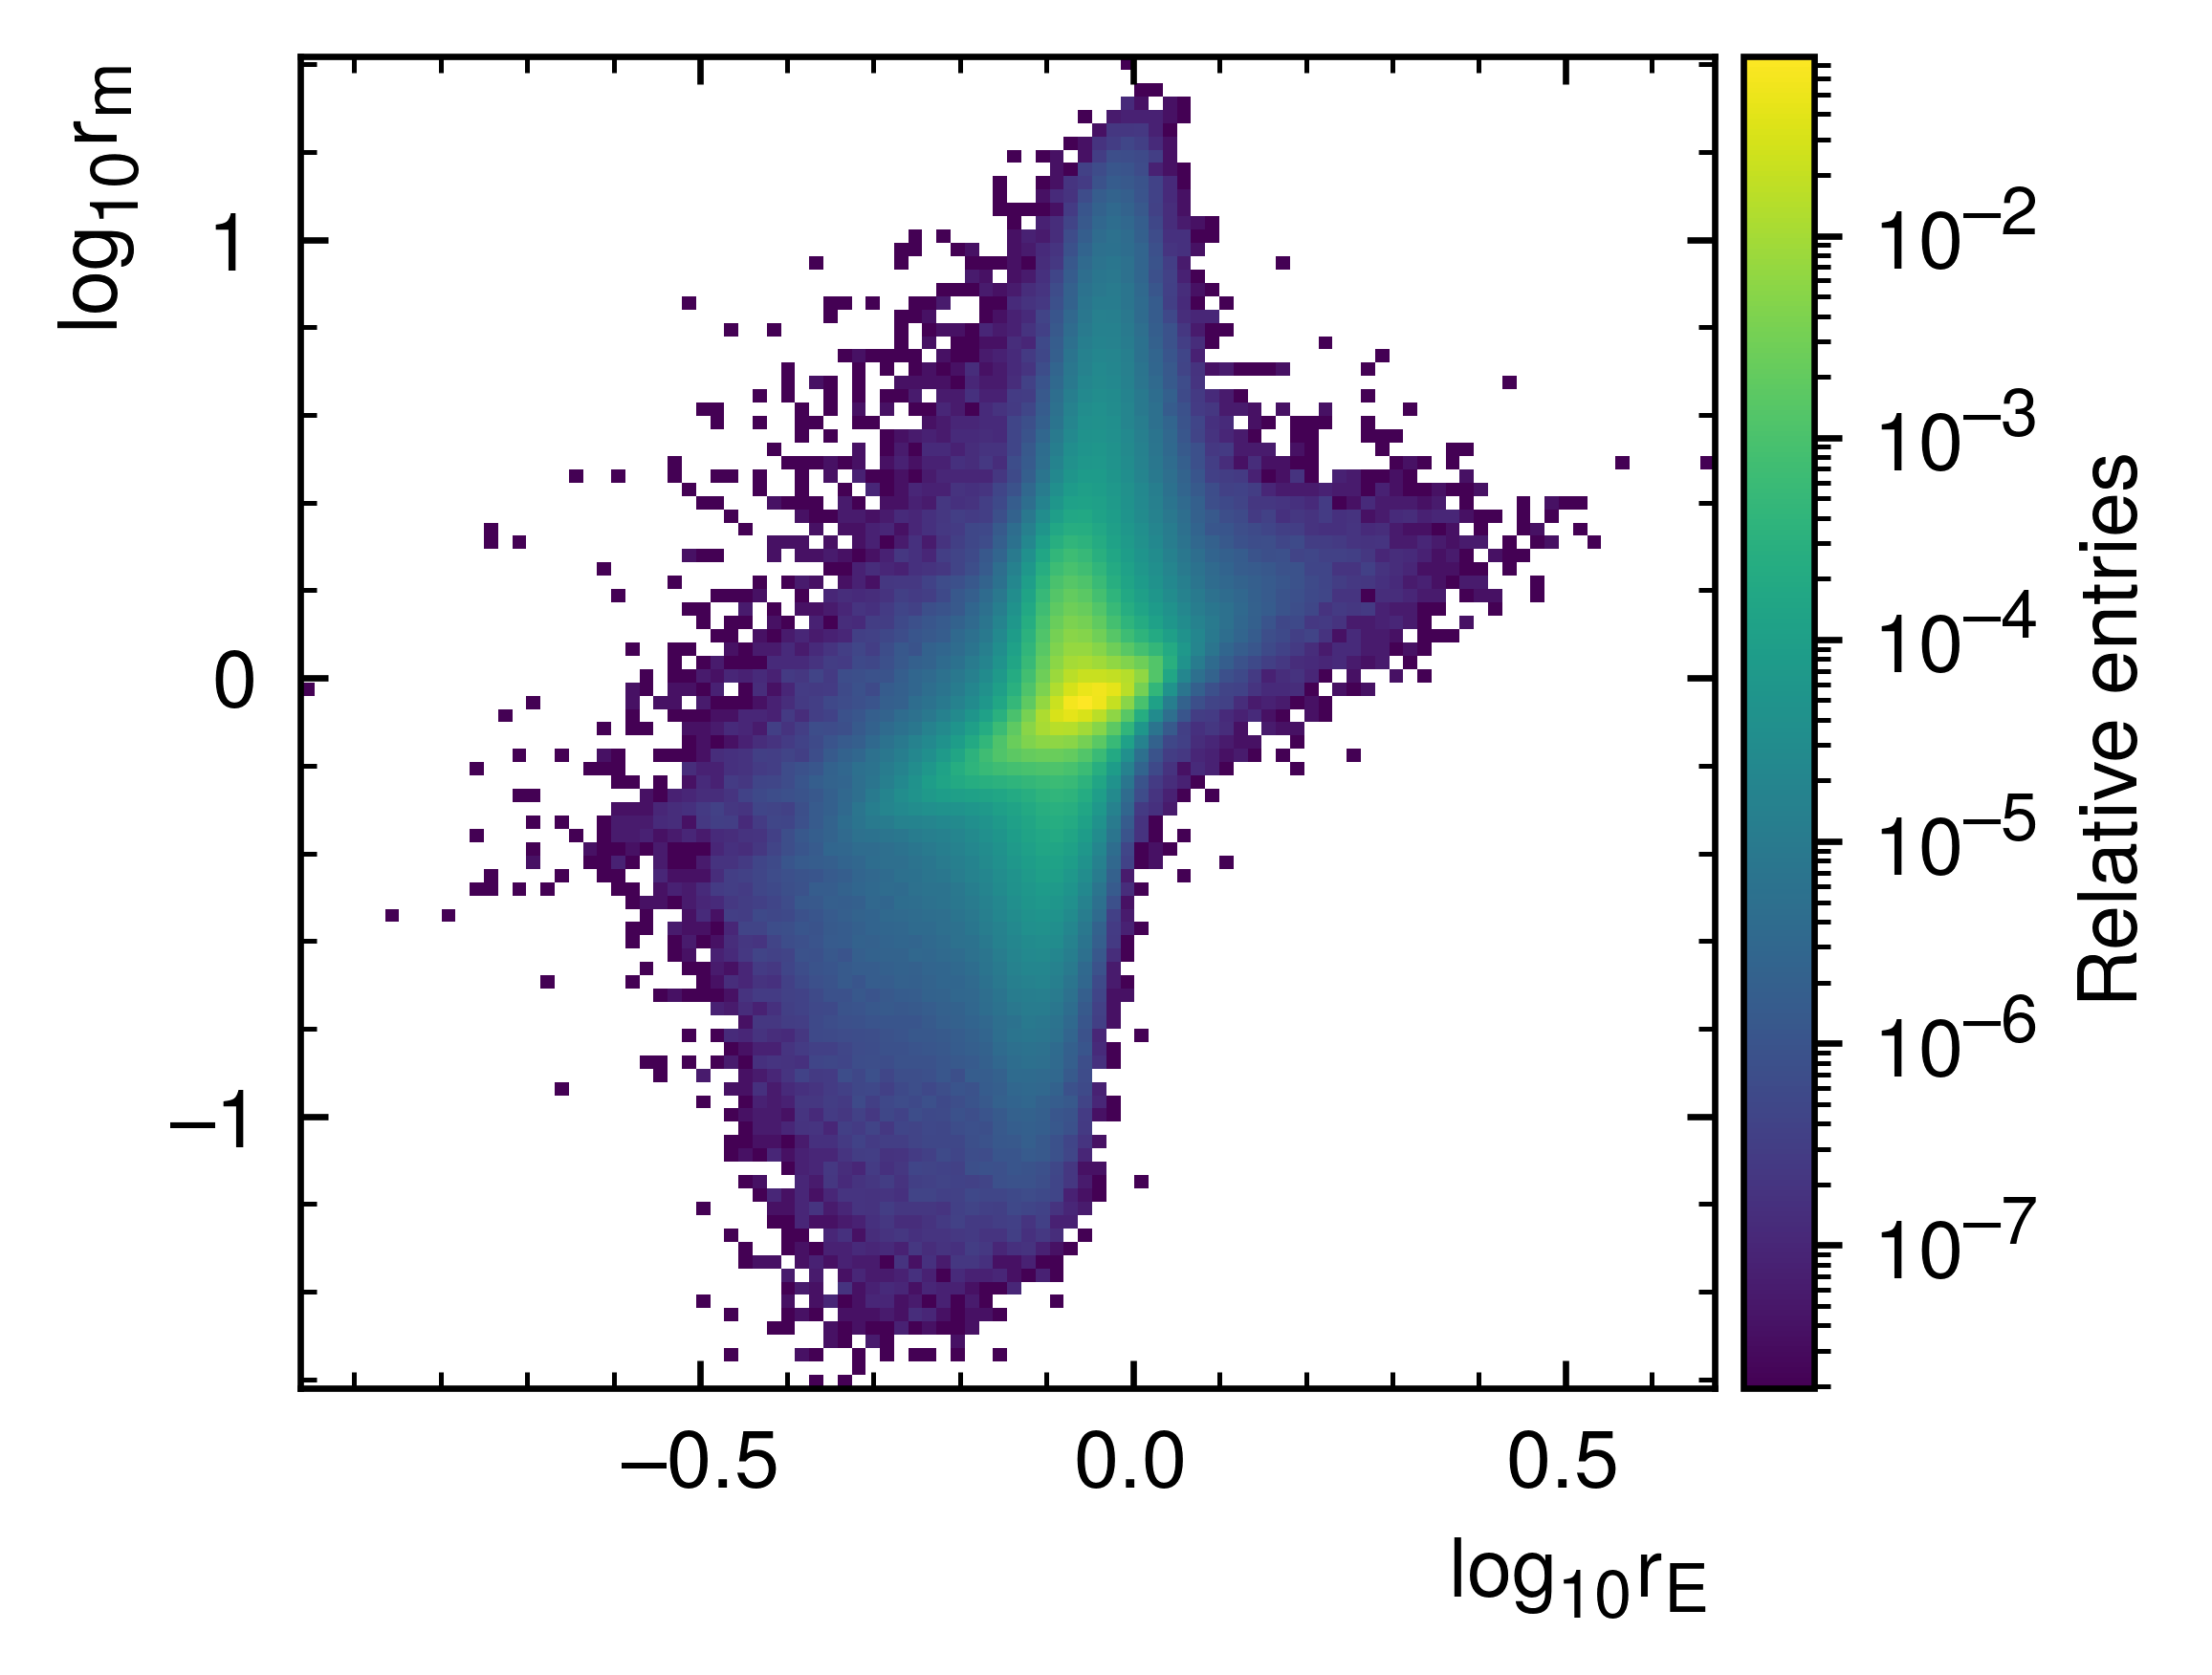

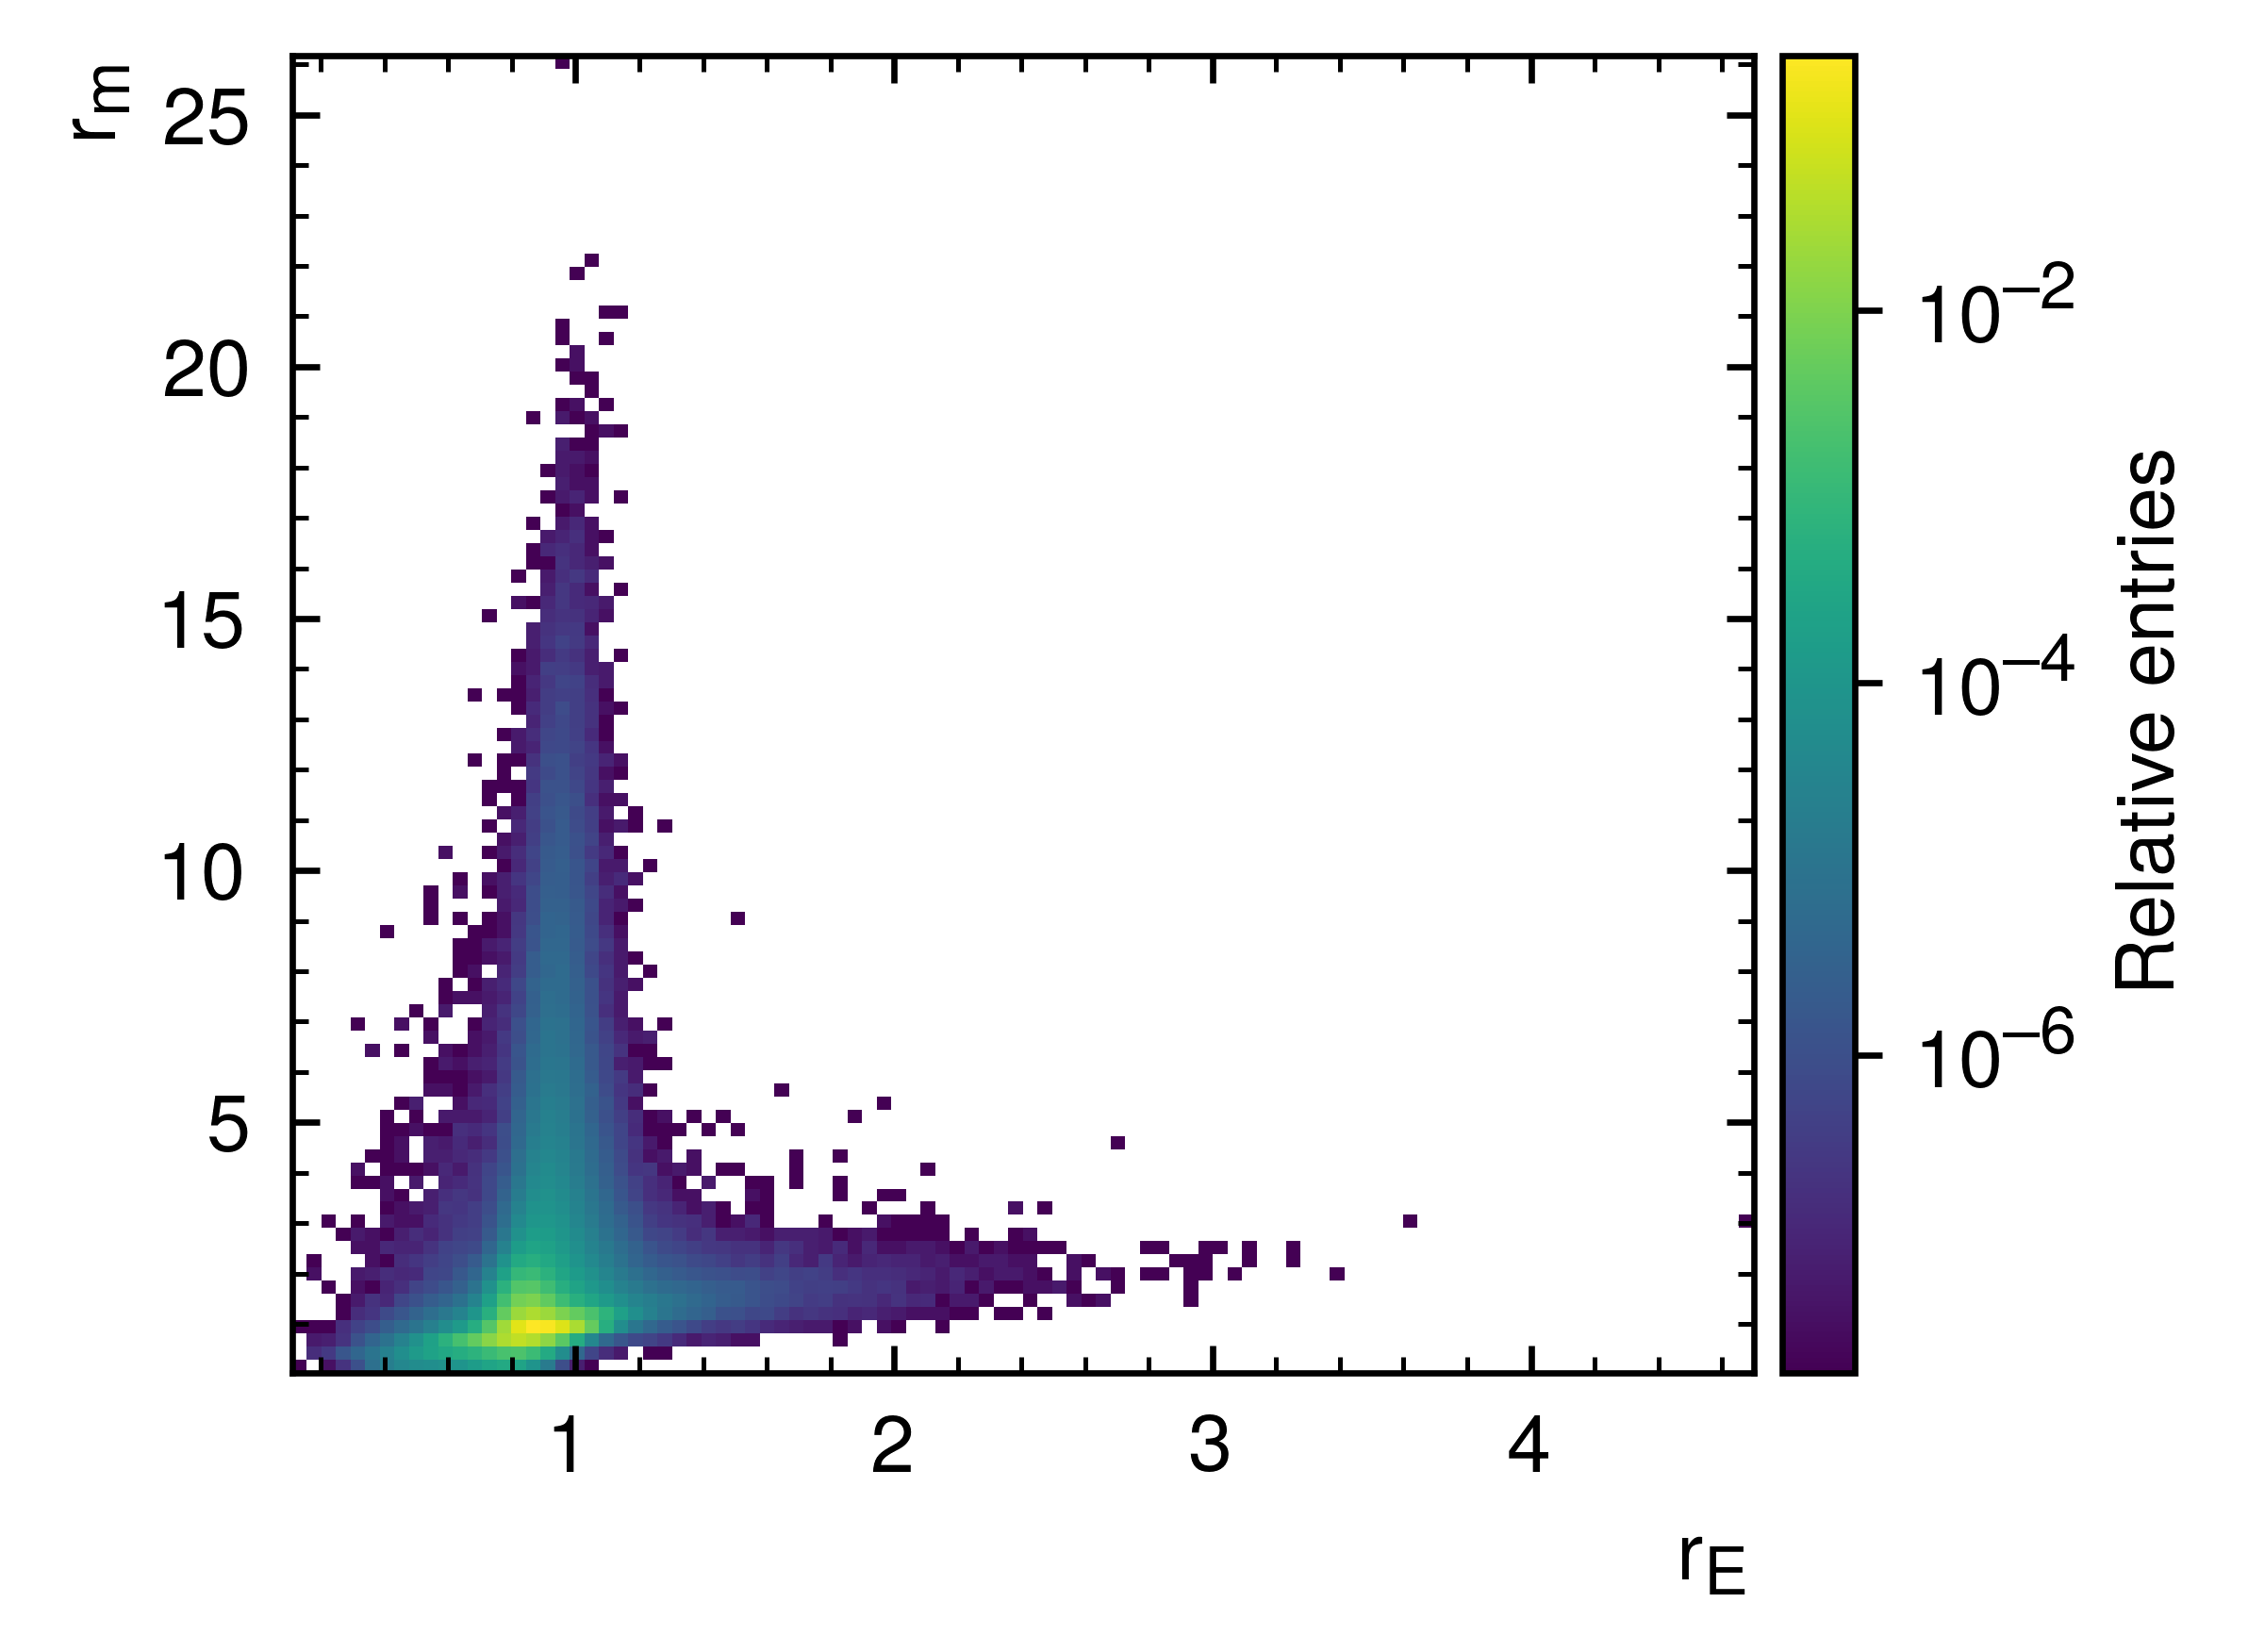

In [ ]:
from Source.plots import make_hist_2dim

plt.close()

fig, axs = make_hist_2dim(
    data=[target_data[:,0], target_data[:,1]],
    labels=[r"$\text{log}_{10} r_E$", r"$\text{log}_{10} r_m$"],
    ranges=[[min_values[0], max_values[0]], [min_values[1], max_values[1]]],
    showdiag=False,
    nbins=[100,100],
    norm_columns=False,
    norm_rows=False
)

fig.tight_layout()
plt.show()
fig.savefig("/remote/gpu03/schiller/JetCalibration/results/vis_data/target_correlations_log.pdf")

plt.close()

fig, axs = make_hist_2dim(
    data=[np.pow(10., target_data[:,0]), np.pow(10., target_data[:,1])],
    labels=[r"$r_E$", r"$r_m$"],
    ranges=[[np.power(10., min_values[0]), np.power(10., max_values[0])], [np.power(10., min_values[1]), np.power(10., max_values[1])]],
    showdiag=False,
    nbins=[100,100],
    norm_columns=False,
    norm_rows=False
)

fig.tight_layout()
plt.show()
fig.savefig("/remote/gpu03/schiller/JetCalibration/results/vis_data/target_correlations.pdf")

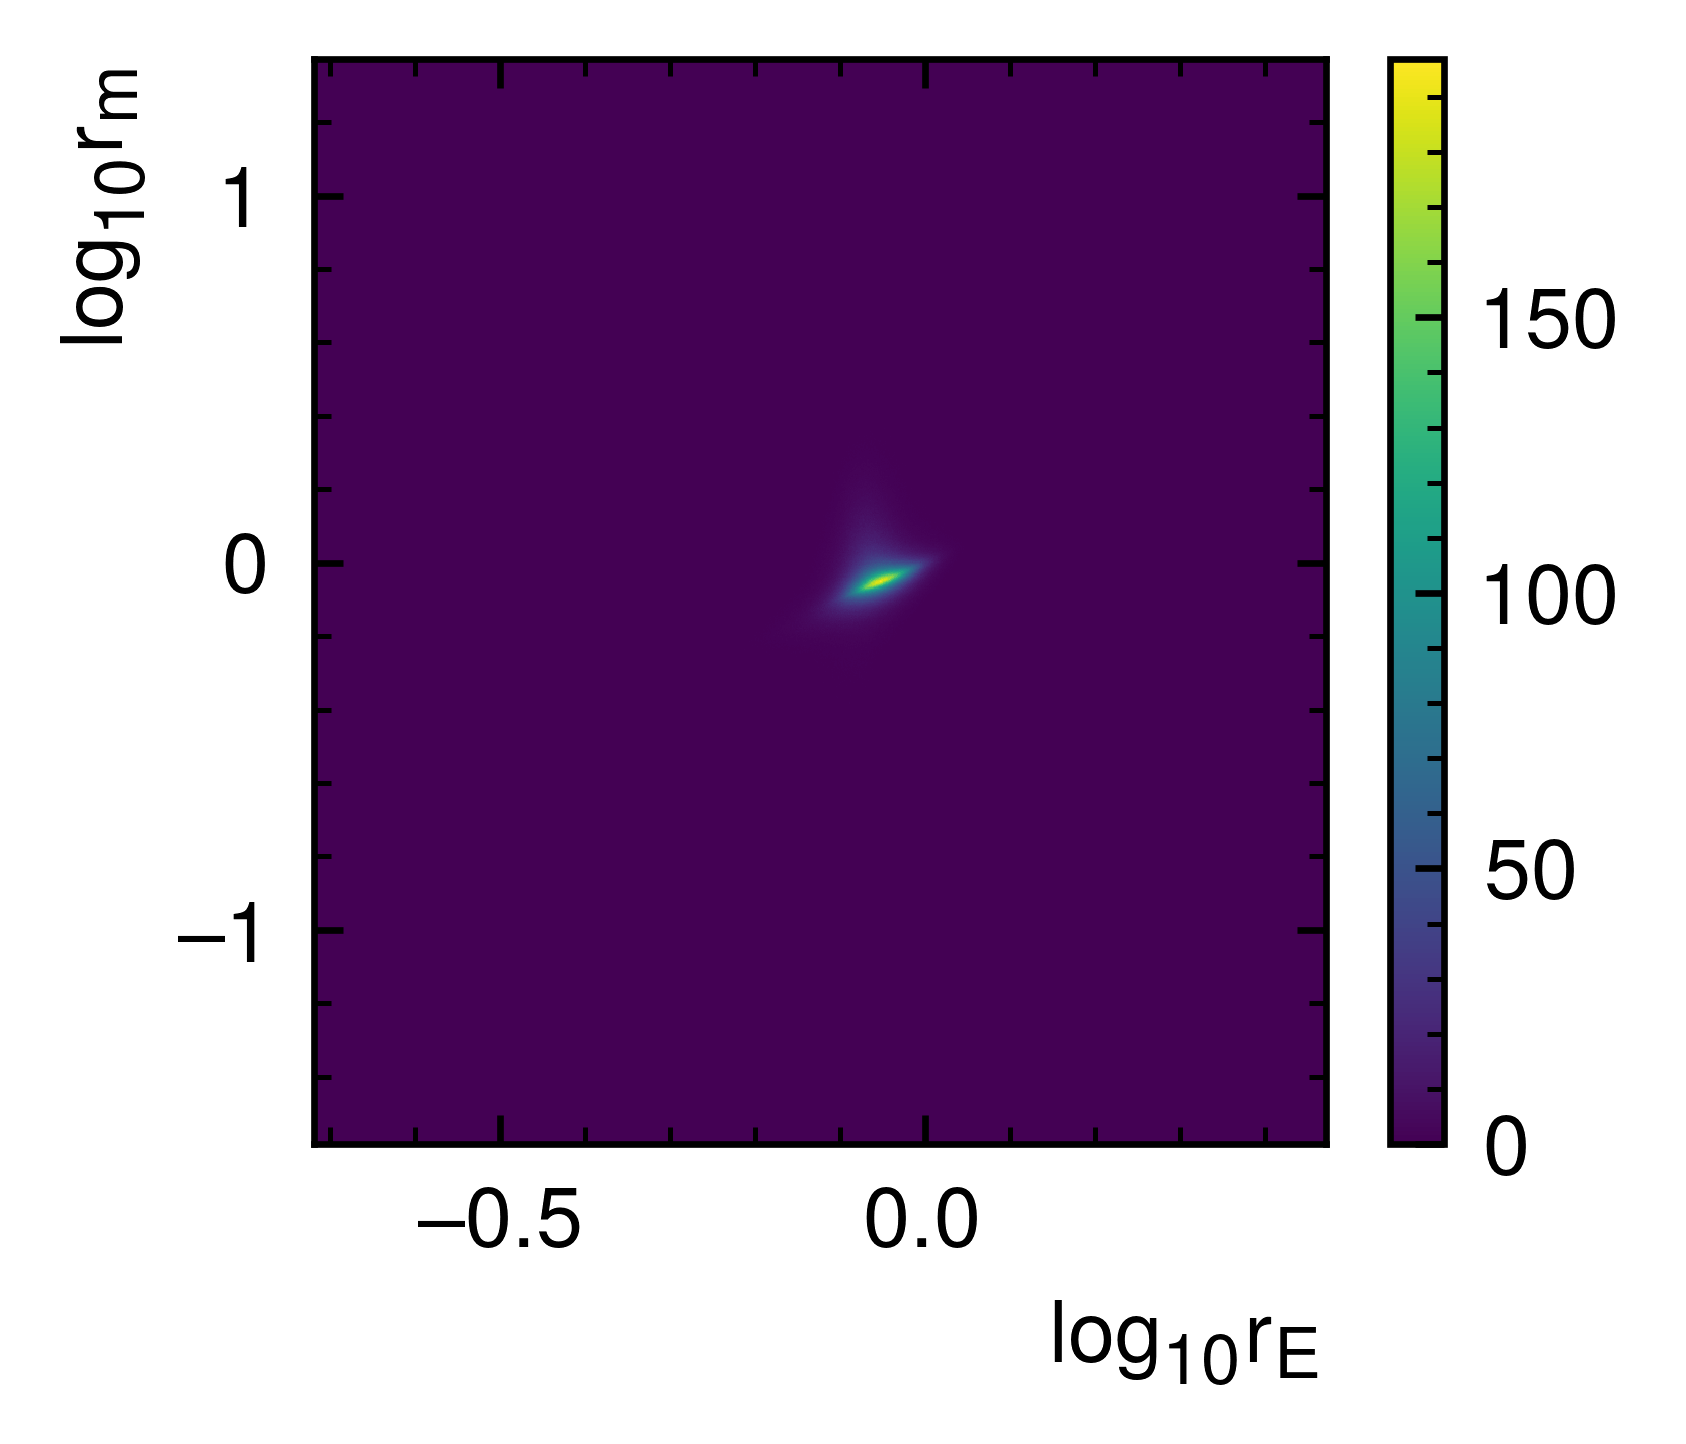

In [6]:
plt.figure()

plt.hist2d(target_data[:,0], target_data[:,1], bins=1000, density=True)
plt.xlabel(r"$\text{log}_{10} r_E$")
plt.ylabel(r"$\text{log}_{10} r_m$")

plt.colorbar()
plt.tight_layout()

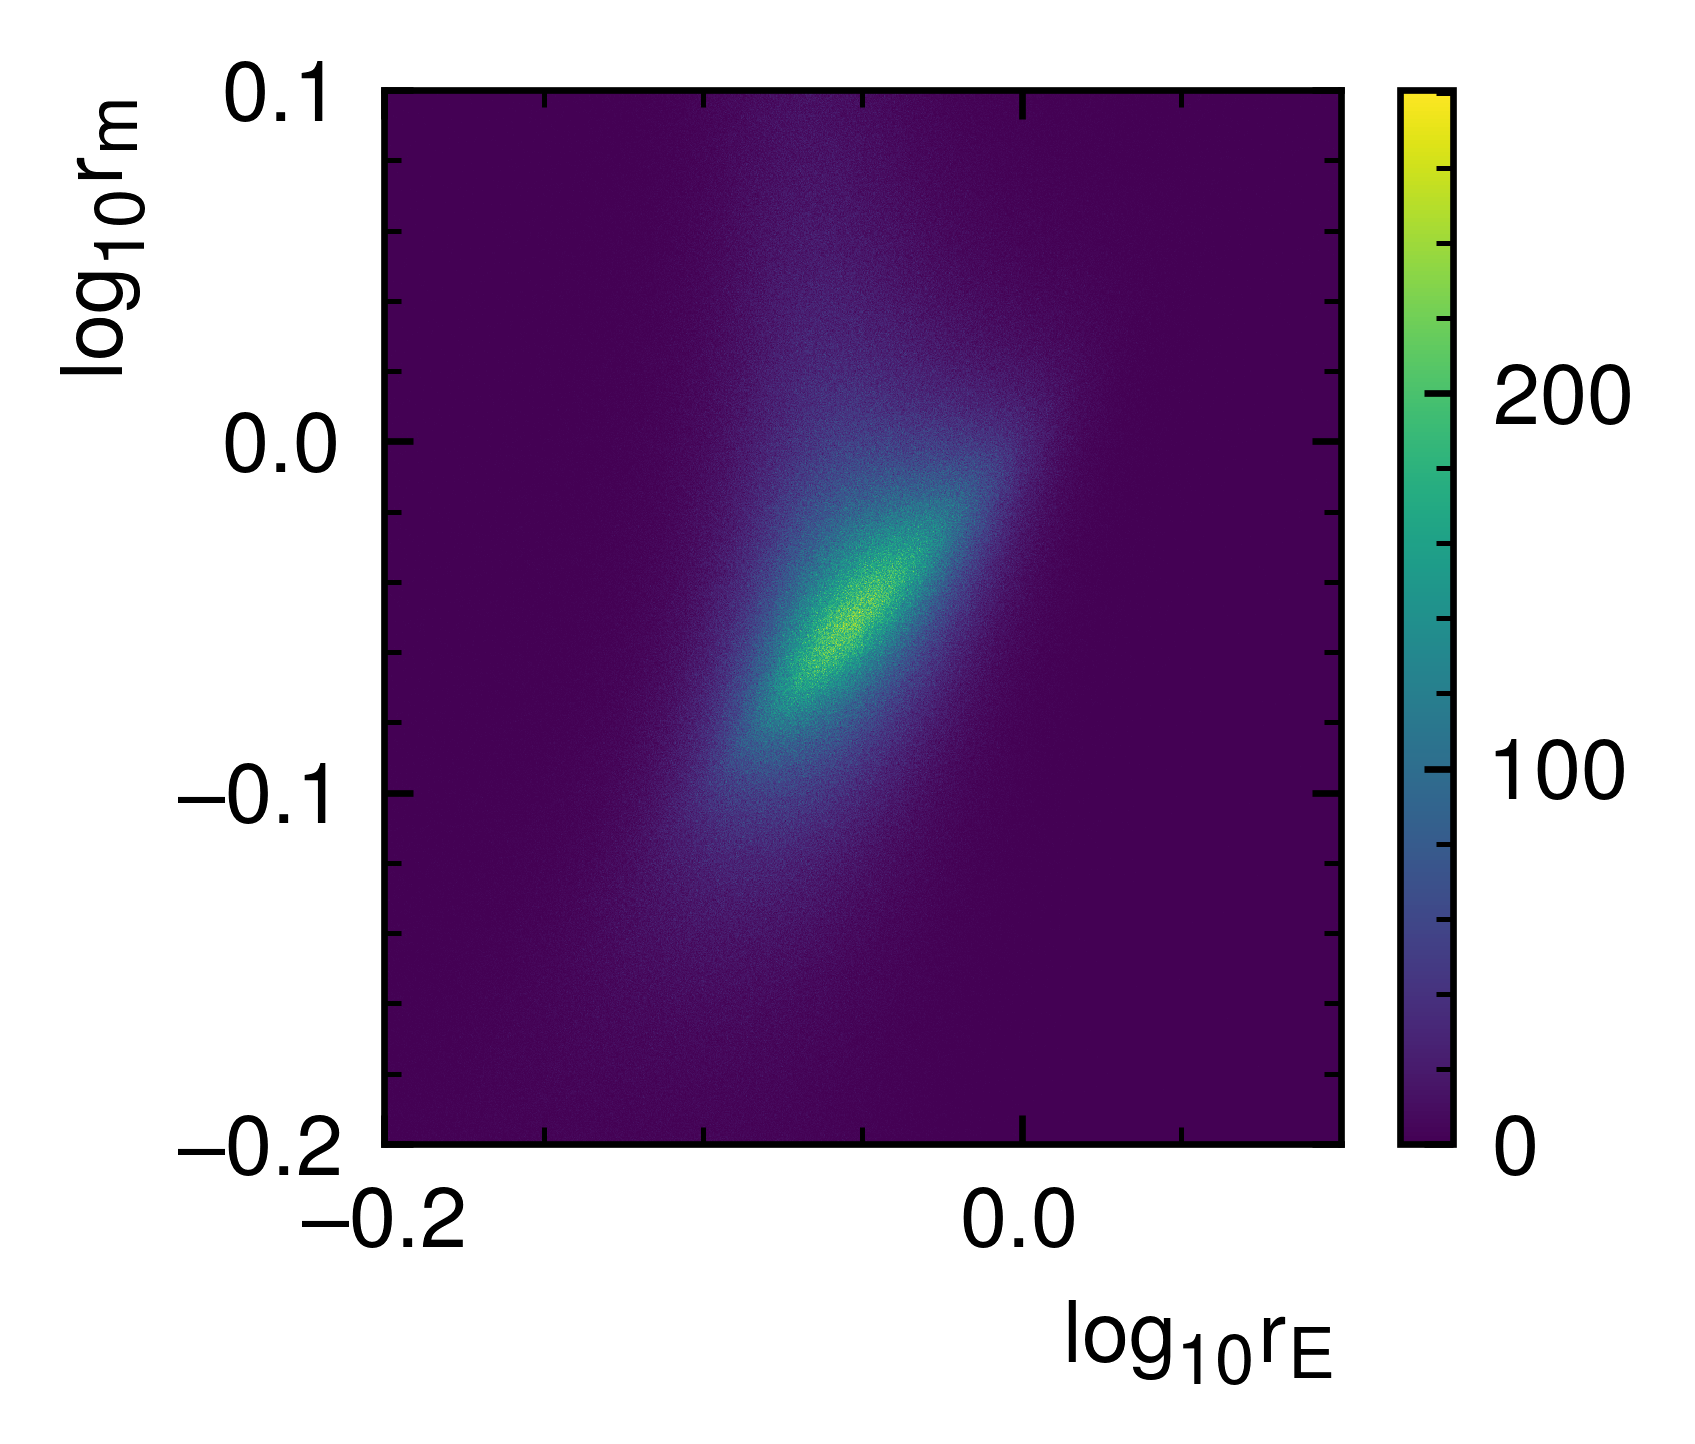

In [7]:
plt.figure()

plt.hist2d(target_data[:,0], target_data[:,1], range=[[-0.2, 0.1], [-0.2, 0.1]], bins=1000, density=True)
plt.xlabel(r"$\text{log}_{10} r_E$")
plt.ylabel(r"$\text{log}_{10} r_m$")

plt.colorbar()
plt.tight_layout()

# Jet correlations

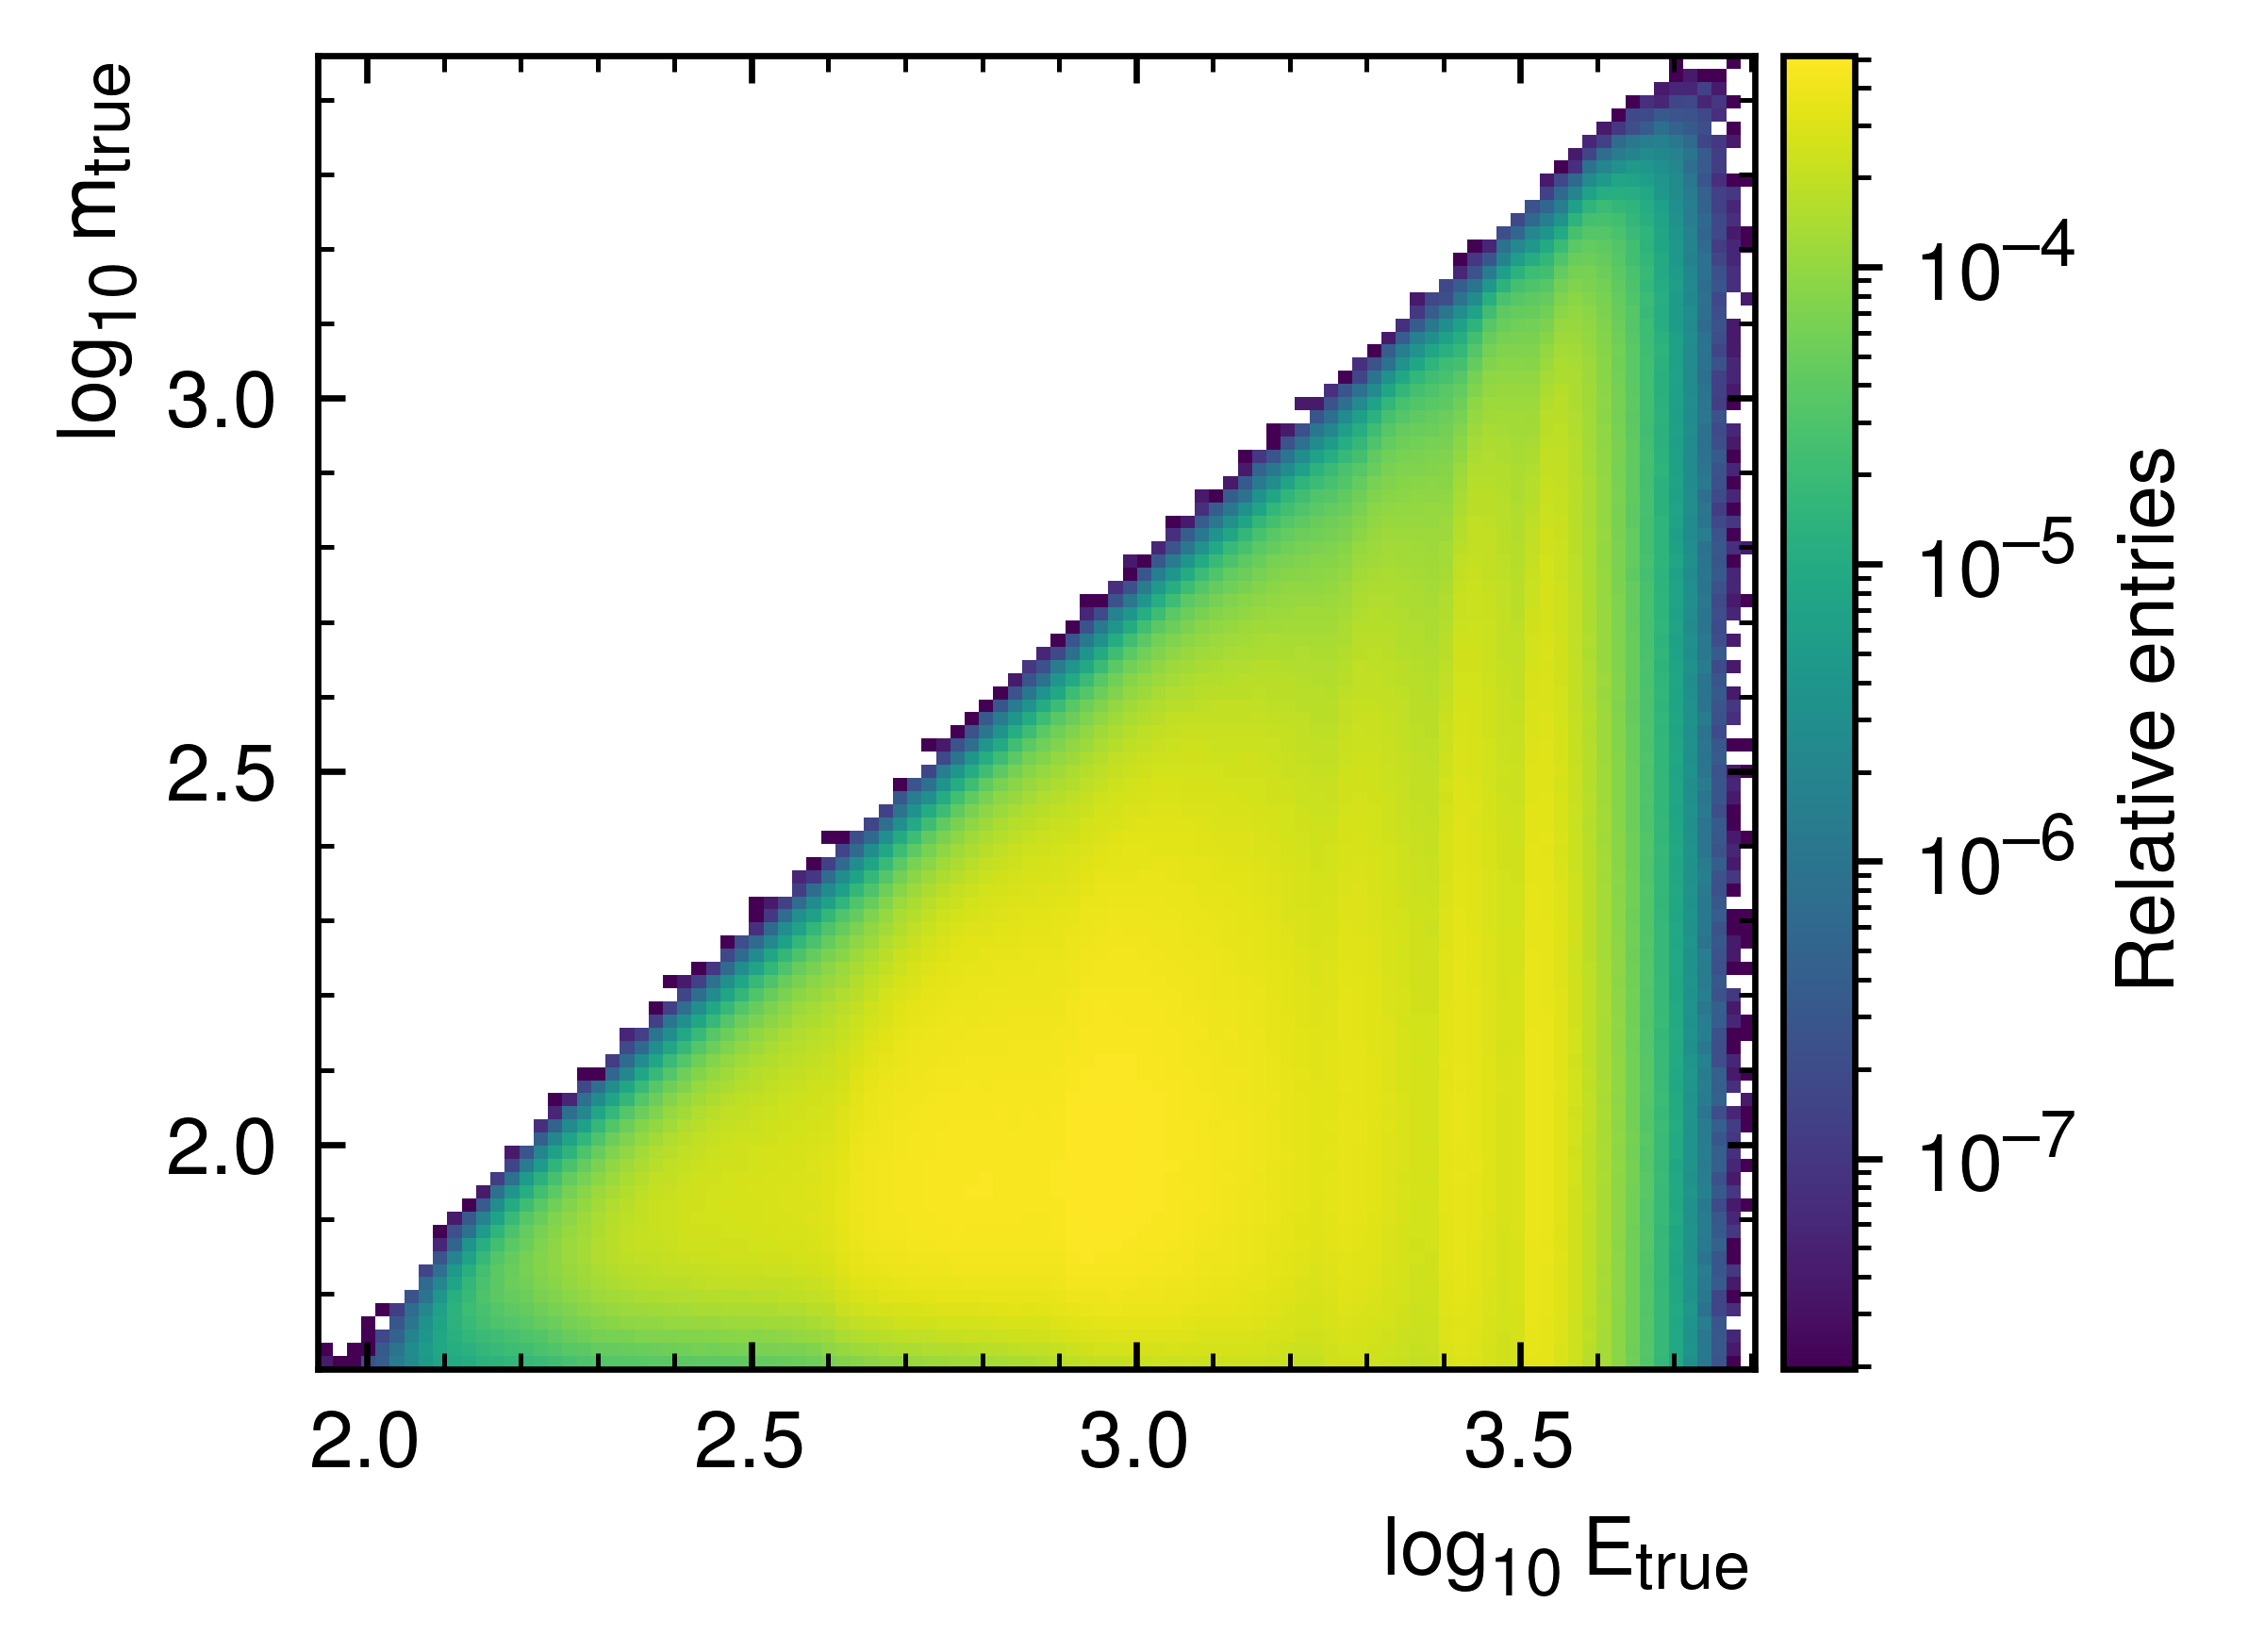

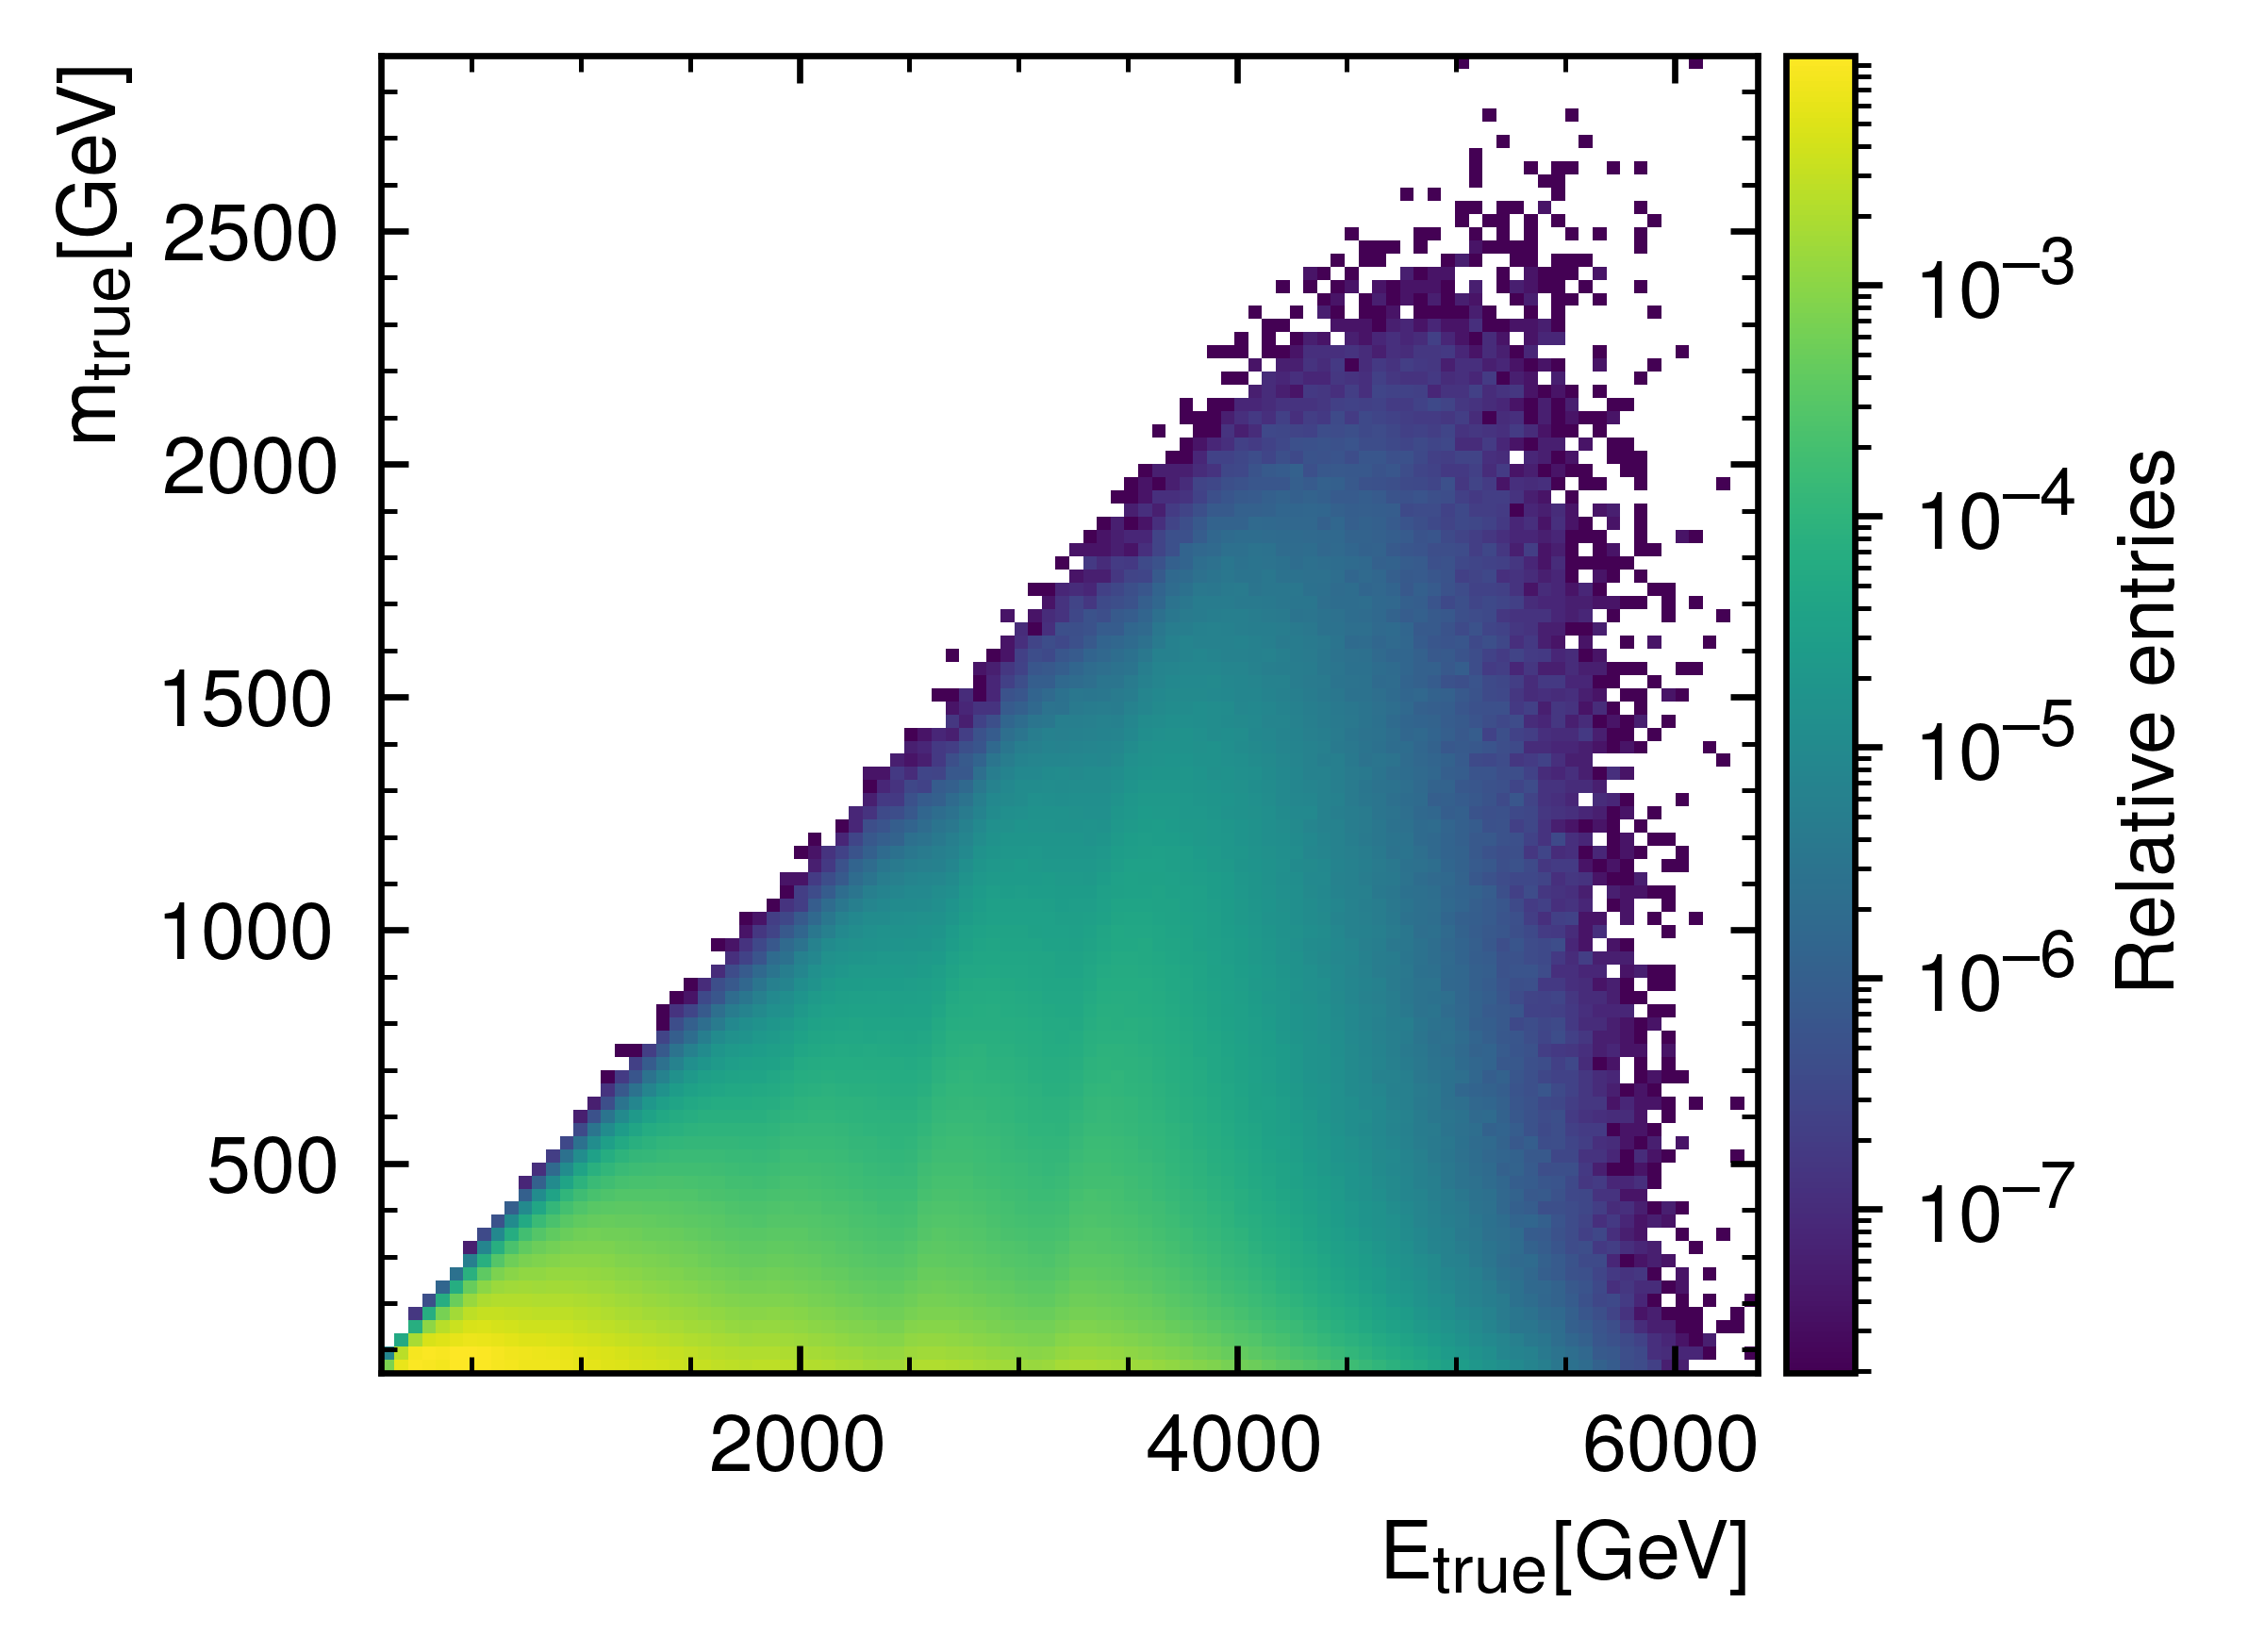

In [15]:
from Source.plots import make_hist_2dim

plt.close()

fig, axs = make_hist_2dim(
    data=[vals_log[:,0], vals_log[:,1]],
    labels=[r"$\log_{10} E_{\text{true}}$", r"$\log_{10} m_{\text{true}}$"],
    ranges=[[min_vals_log[0], max_vals_log[0]], [min_vals_log[1], max_vals_log[1]]],
    showdiag=False,
    nbins=[100,100],
    norm_columns=False,
    norm_rows=False
)

fig.tight_layout()
plt.show()
fig.savefig("/remote/gpu03/schiller/JetCalibration/results/vis_data/jet_true_correlations_log.pdf")

plt.close()

fig, axs = make_hist_2dim(
    data=[vals[:, 0], vals[:, 1]],
    labels=[r"$E_{\text{true}} [\text{GeV}]$", r"$m_{\text{true}} [\text{GeV}]$"],
    ranges=[[min_vals[0], max_vals[0]], [min_vals[1], max_vals[1]]],
    showdiag=False,
    nbins=[100,100],
    norm_columns=False,
    norm_rows=False
)

# E_lin = np.linspace(min_vals[0], max_vals[0], 2)
# axs.plot(E_lin, 0.5 * E_lin)

fig.tight_layout()
plt.show()
fig.savefig("/remote/gpu03/schiller/JetCalibration/results/vis_data/jet_true_correlations.pdf")

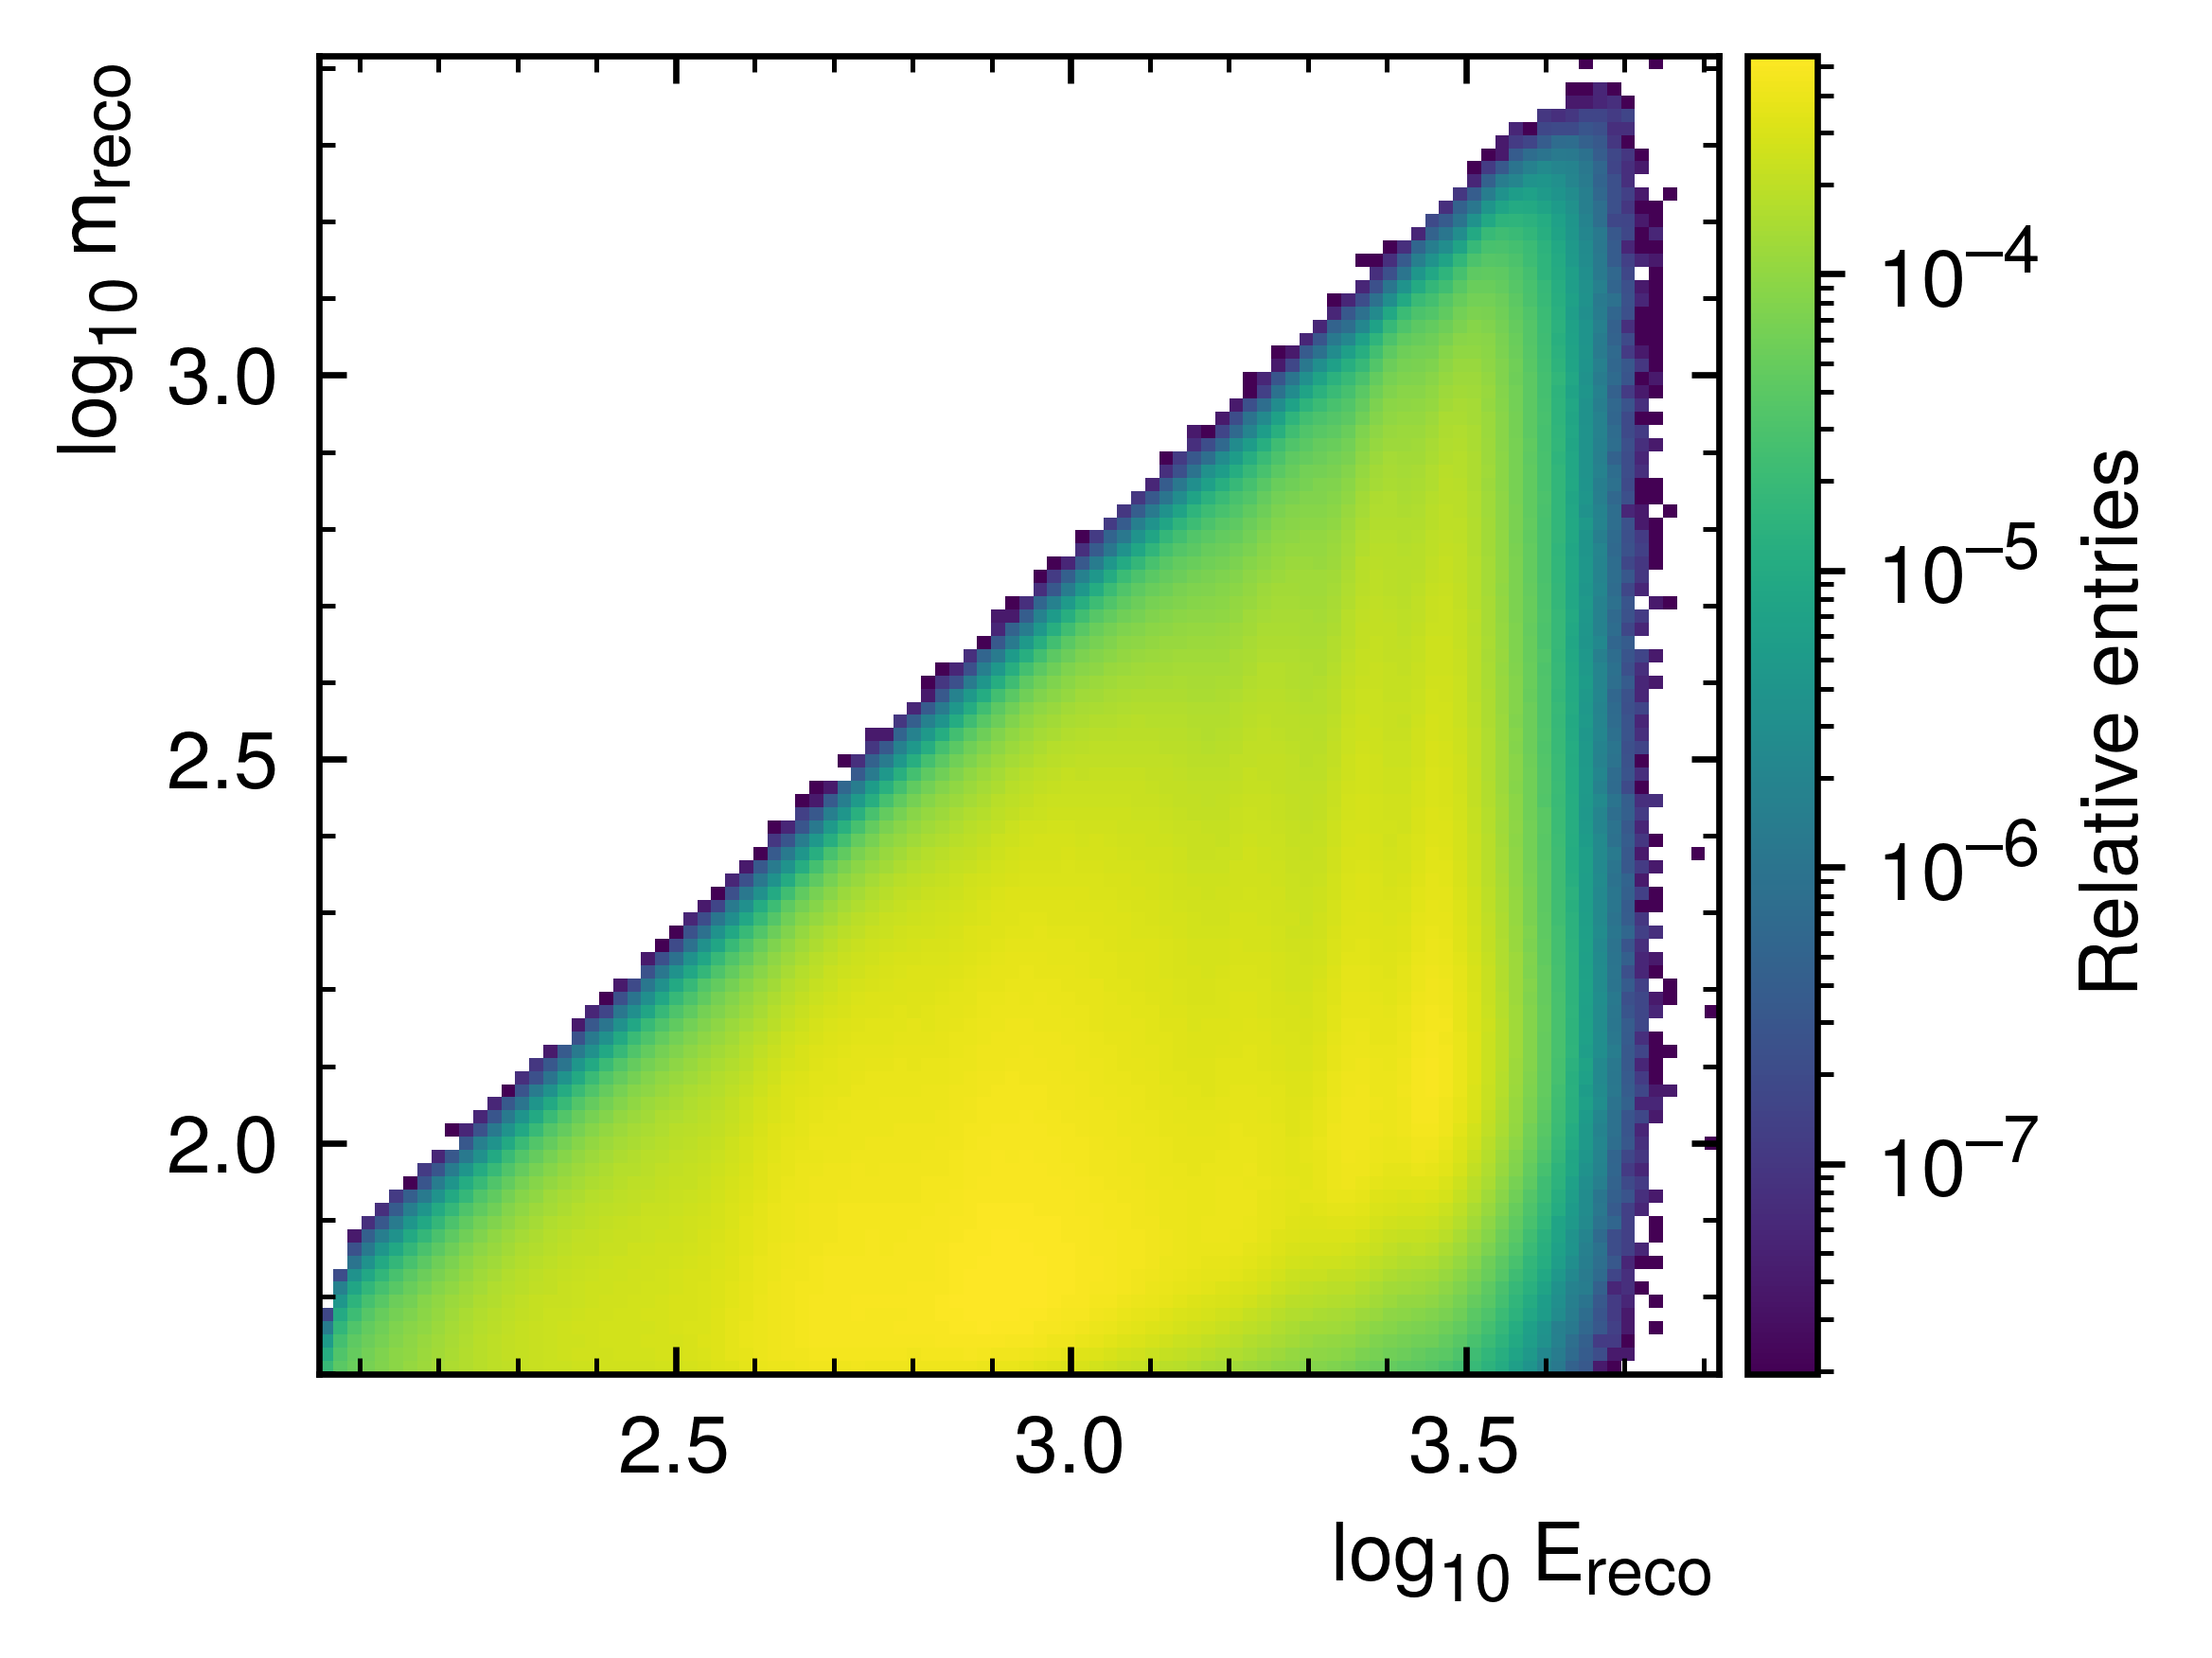

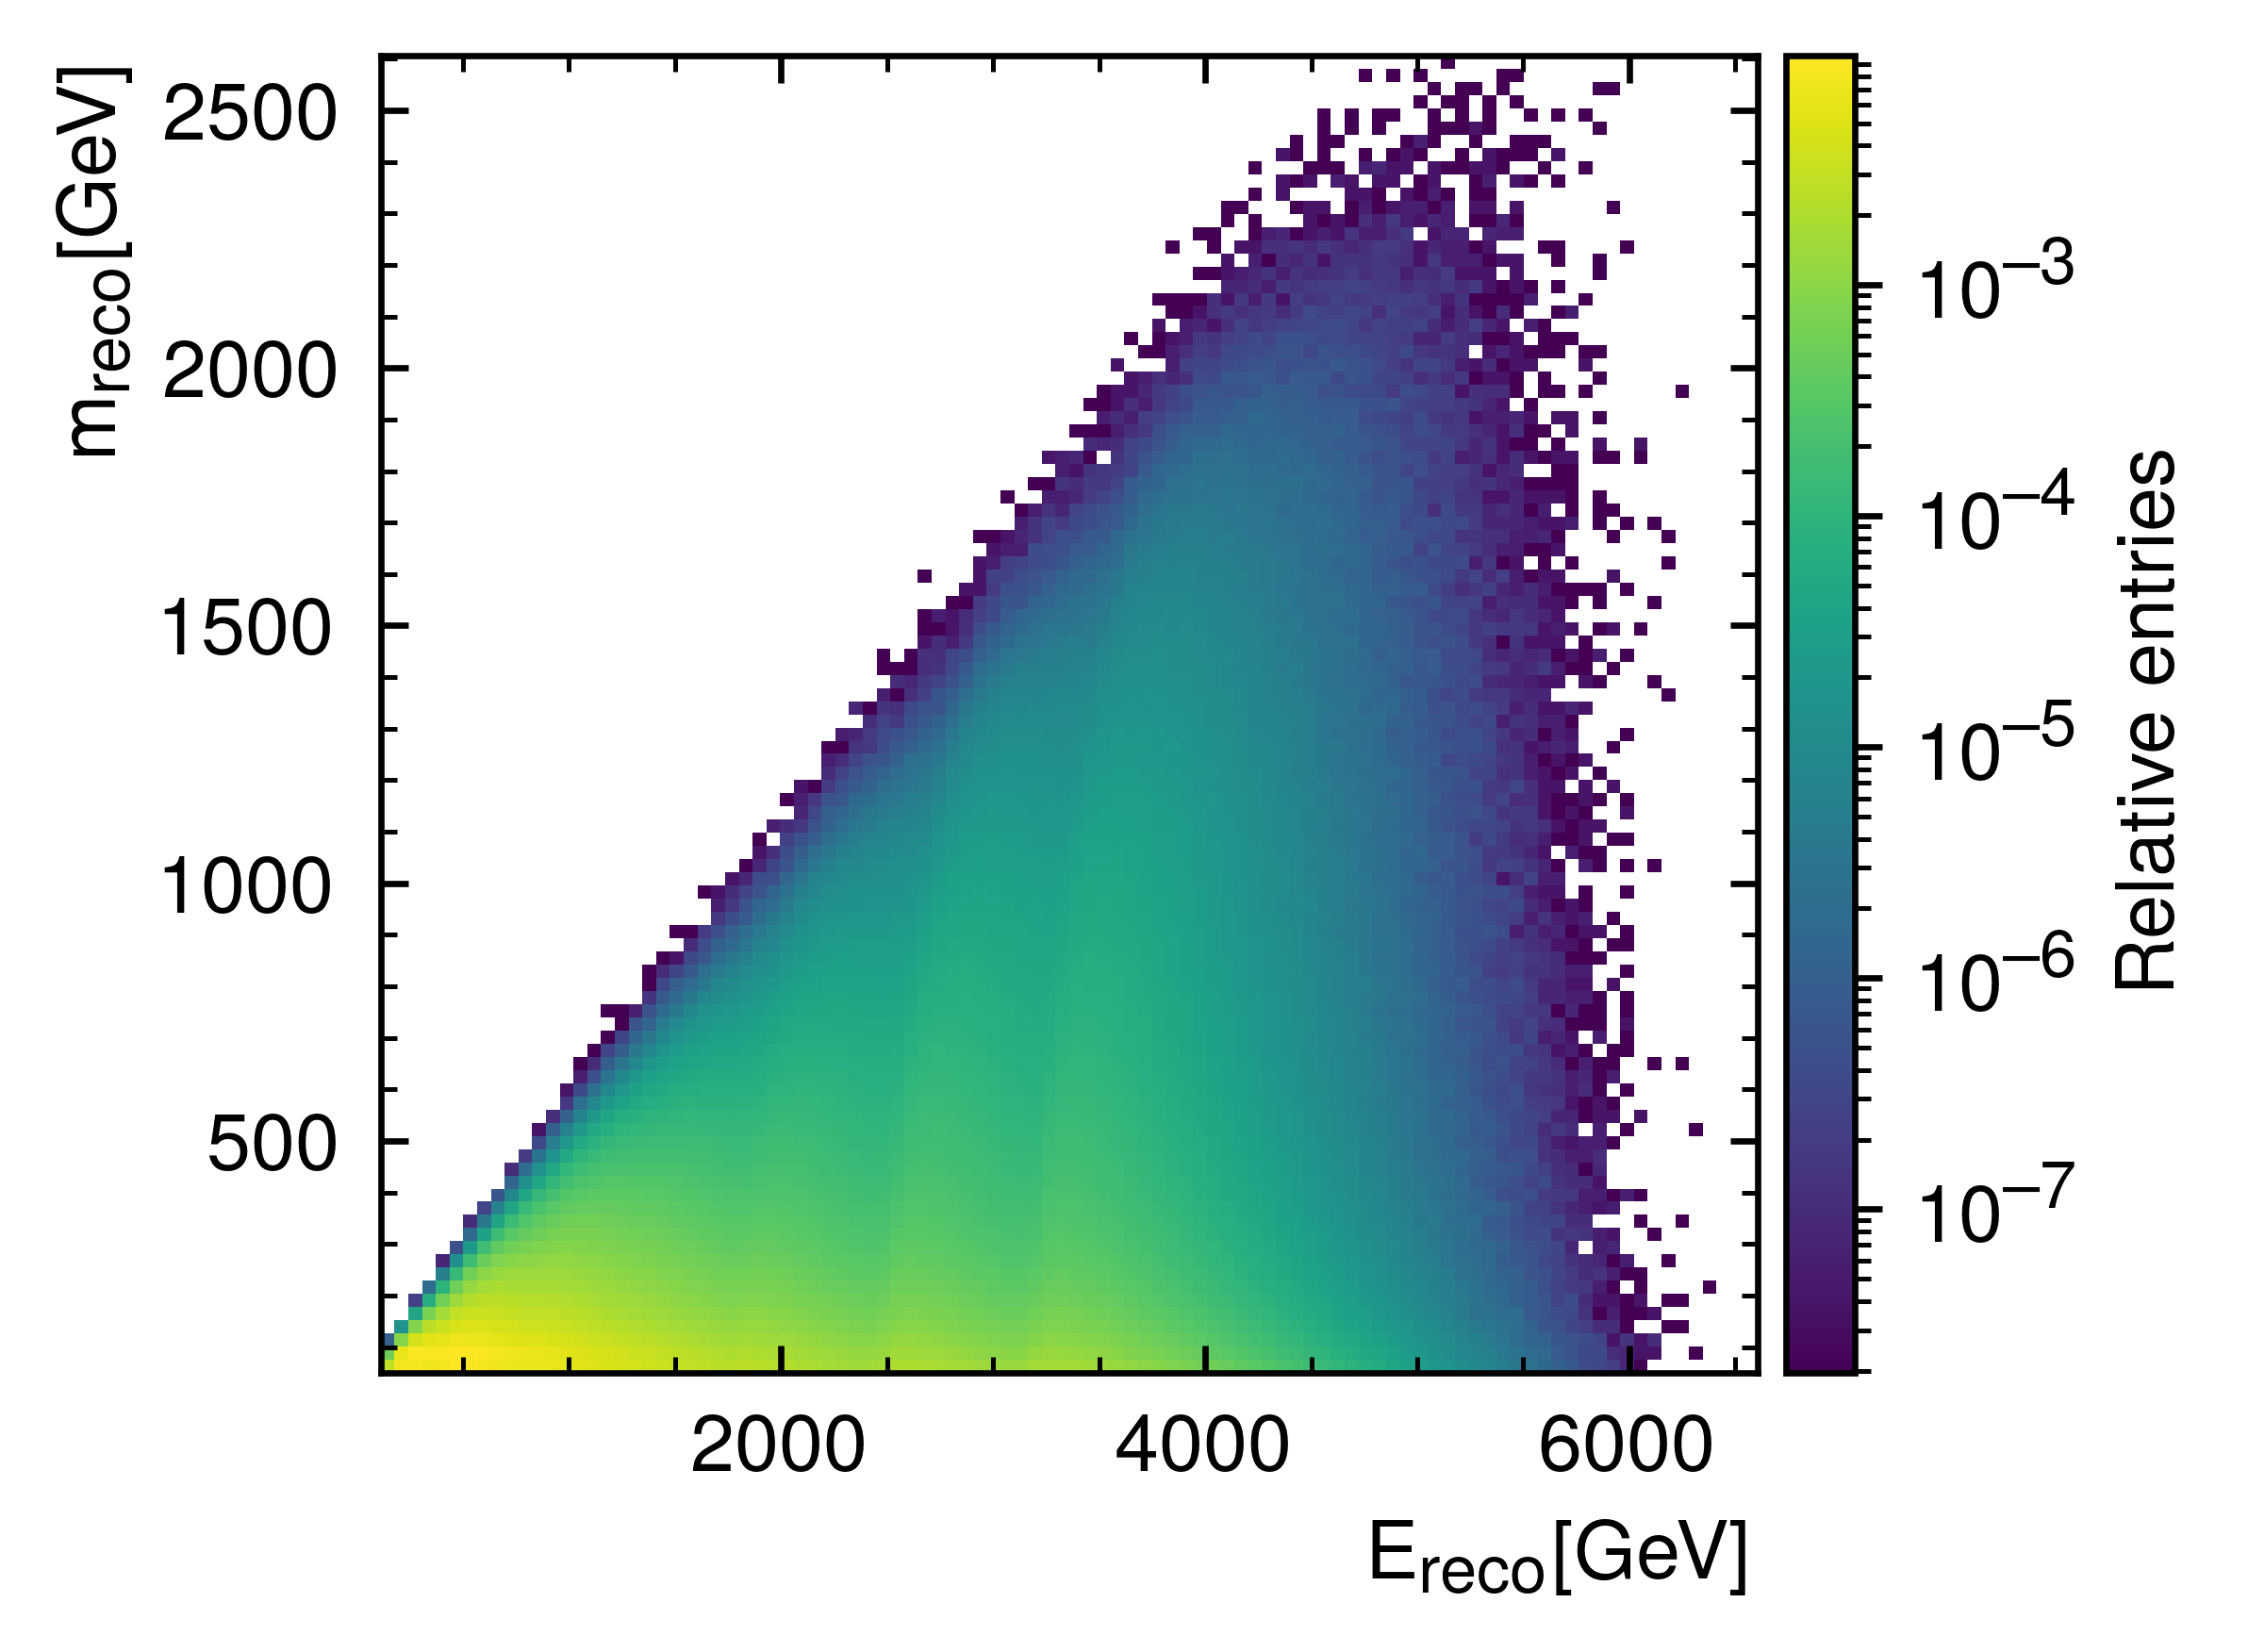

In [17]:
from Source.plots import make_hist_2dim

plt.close()

fig, axs = make_hist_2dim(
    data=[vals_reco_log[:,0], vals_reco_log[:,1]],
    labels=[r"$\log_{10} E_{\text{reco}}$", r"$\log_{10} m_{\text{reco}}$"],
    ranges=[[min_vals_reco_log[0], max_vals_reco_log[0]], [min_vals_reco_log[1], max_vals_reco_log[1]]],
    showdiag=False,
    nbins=[100,100],
    norm_columns=False,
    norm_rows=False
)

fig.tight_layout()
plt.show()
fig.savefig("/remote/gpu03/schiller/JetCalibration/results/vis_data/jet_reco_correlations_log.pdf")

plt.close()

fig, axs = make_hist_2dim(
    data=[vals[:, 0], vals[:, 1]],
    labels=[r"$E_{\text{reco}} [\text{GeV}]$", r"$m_{\text{reco}} [\text{GeV}]$"],
    ranges=[[min_vals_reco[0], max_vals_reco[0]], [min_vals_reco[1], max_vals_reco[1]]],
    showdiag=False,
    nbins=[100,100],
    norm_columns=False,
    norm_rows=False
)

fig.tight_layout()
plt.show()
fig.savefig("/remote/gpu03/schiller/JetCalibration/results/vis_data/jet_reco_correlations.pdf")

# Marginalized distributions

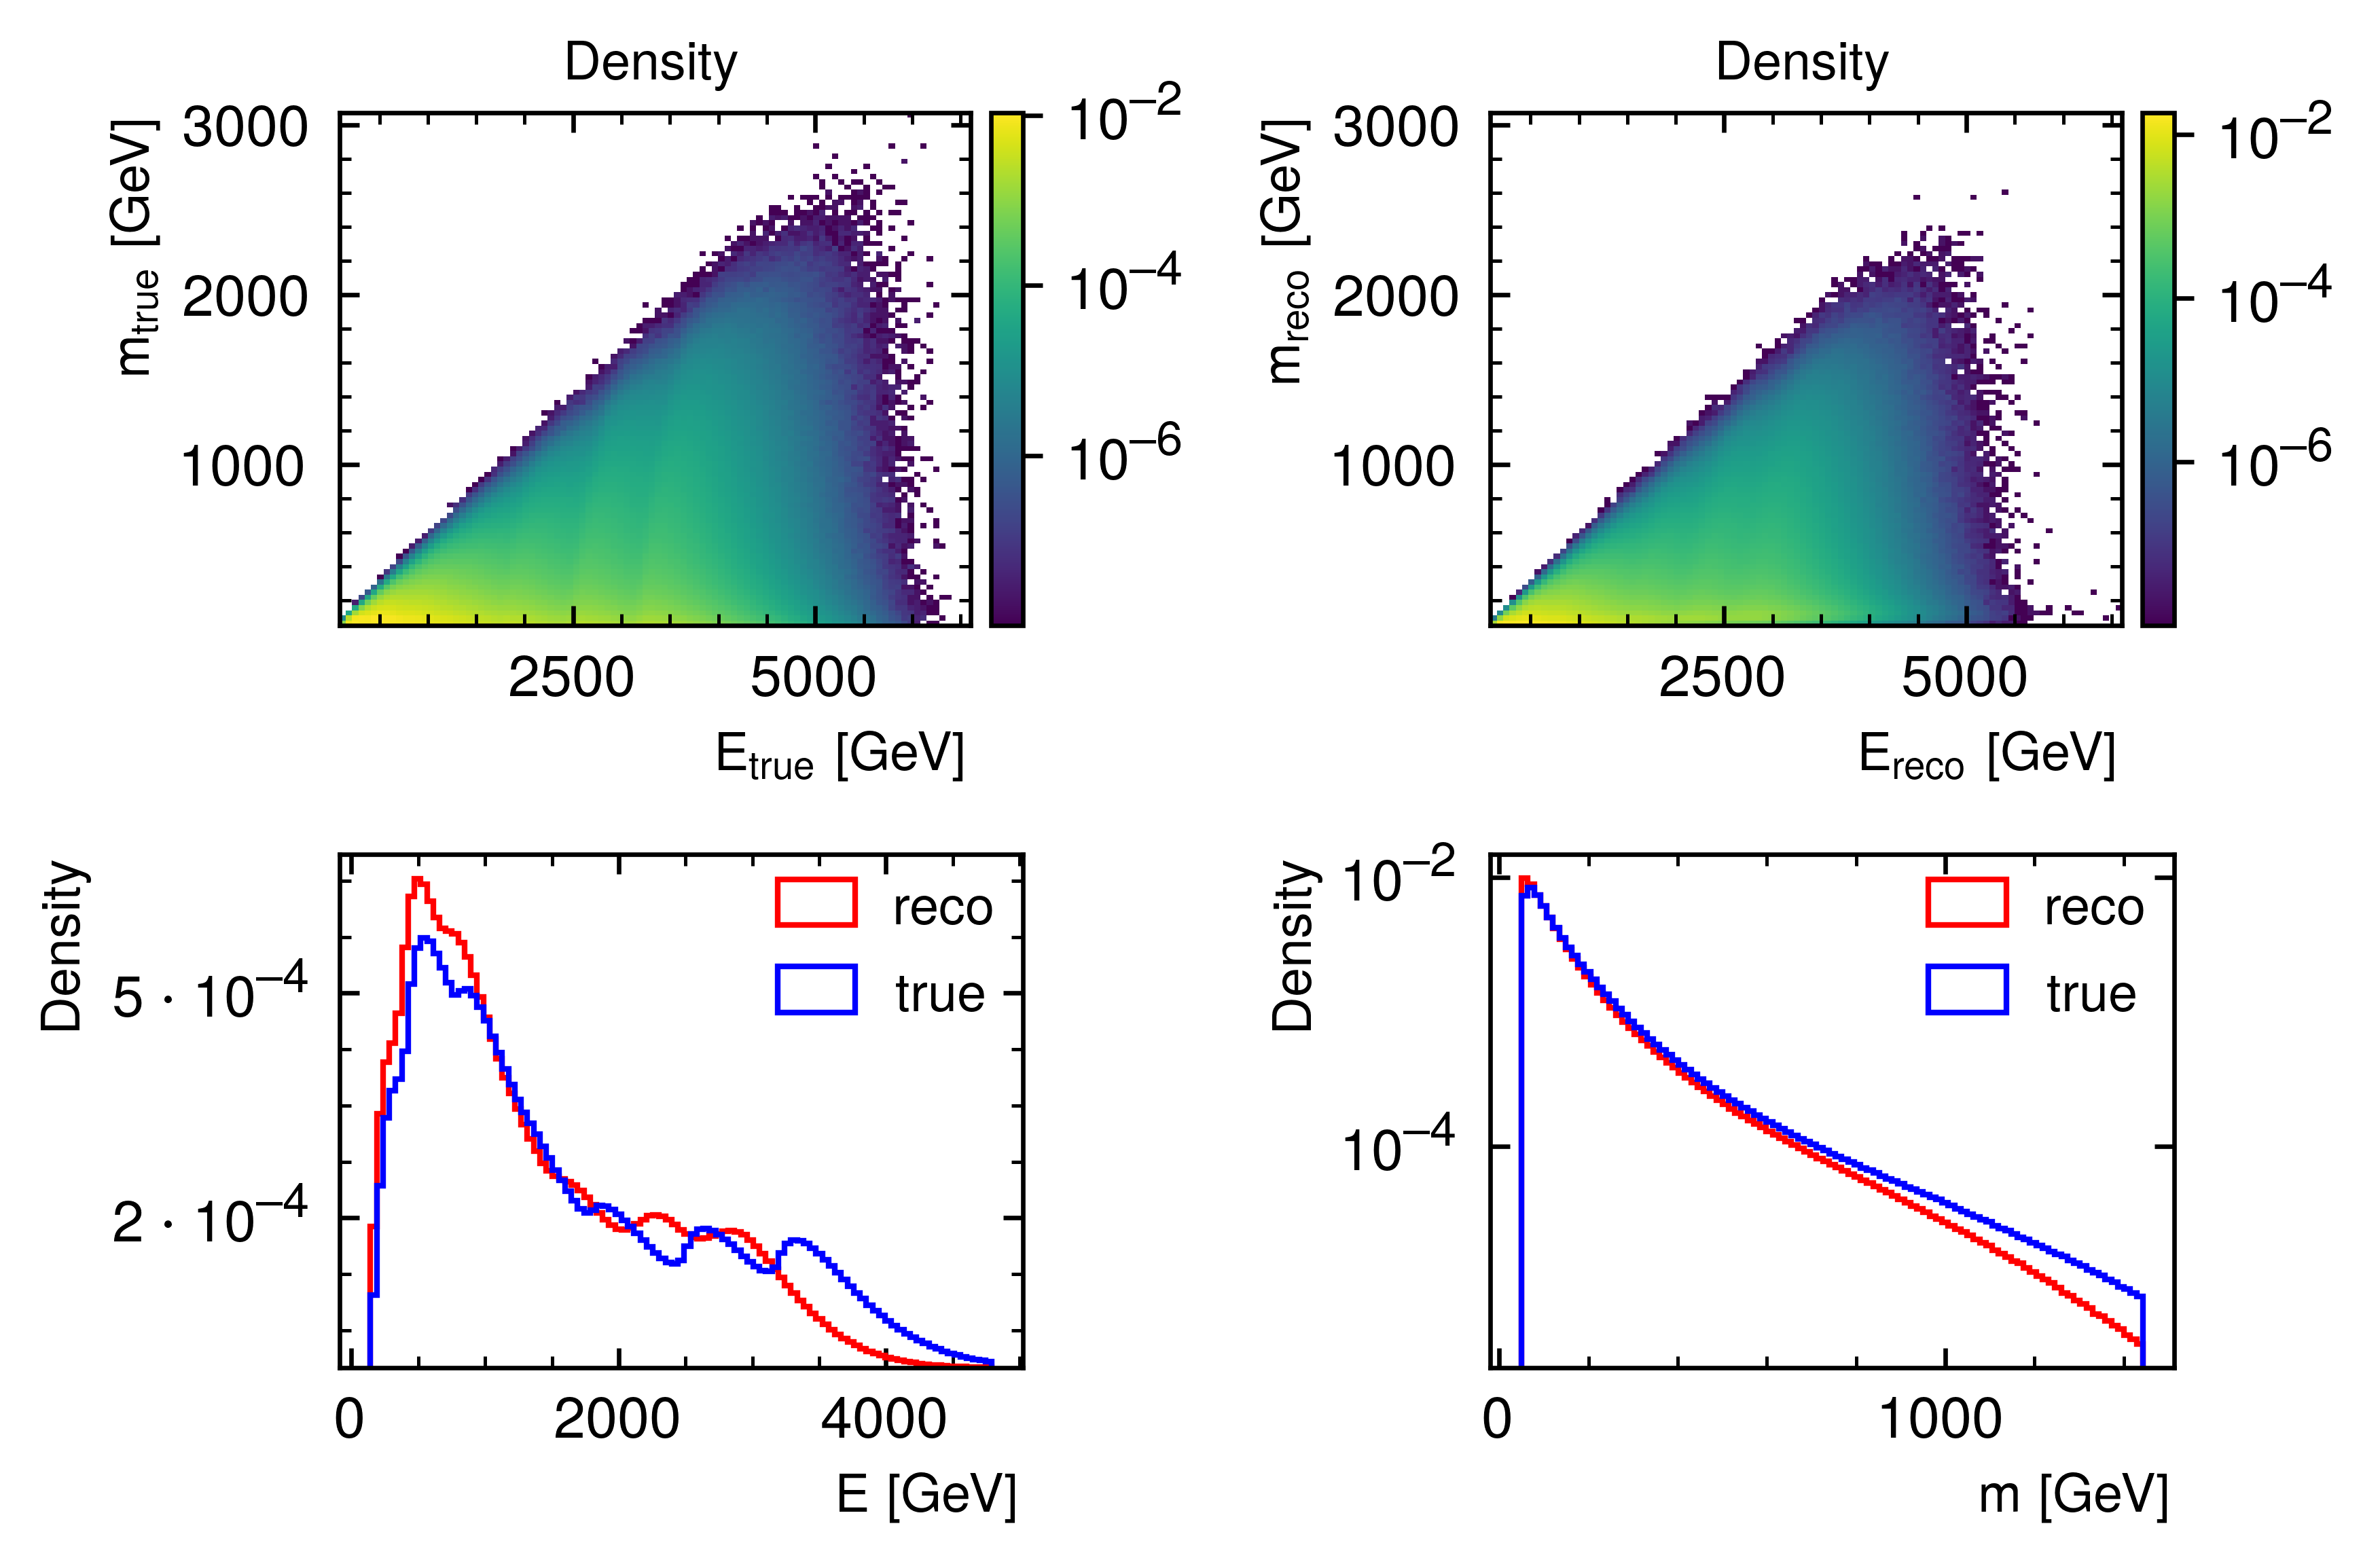

In [35]:
from Source.plots import _make_hist_2dim

label_fontsize = 11

# fig, axs = plt.subplots(2, 2, figsize=(1.40*2.953, 1.20*2.568))
fig, axs = plt.subplots(2, 2, figsize=(6, 4))

nbins = 100

E_range_full = [min(min_vals[0], min_vals_reco[0]), max(max_vals[0], max_vals_reco[0])]
m_range_full = [min(min_vals[1], min_vals_reco[1]), max(max_vals[1], max_vals_reco[1])]
E_range = [np.quantile([vals[:, 0], vals_reco[:, 0]], 0.001), np.quantile([vals[:, 0], vals_reco[:, 0]], 0.999)]
m_range = [np.quantile([vals[:, 1], vals_reco[:, 1]], 0.001), np.quantile([vals[:, 1], vals_reco[:, 1]], 0.999)]

mesh, cax = _make_hist_2dim(
    ax=axs[0,0],
    data=[vals[:,0], vals[:,1]],
    labels=[r"$E_{\text{true}} \; [\text{GeV}]$", r"$m_{\text{true}} \; [\text{GeV}]$"],
    ranges=[E_range_full, m_range_full],
    showdiag=False,
    nbins=[nbins,nbins],
    norm_columns=False,
    norm_rows=False,
    fontsize=label_fontsize
)
cbar = fig.colorbar(mesh, cax=cax)
# cbar.set_label('Density', loc='center', fontsize=label_fontsize)
cbar.ax.tick_params(axis='y', which='both', direction='out')
axs[0, 0].set_title("Density", fontsize=label_fontsize)

mesh, cax = _make_hist_2dim(
    ax=axs[0,1],
    data=[vals_reco[:,0], vals_reco[:,1]],
    labels=[r"$E_{\text{reco}} \; [\text{GeV}]$", r"$m_{\text{reco}} \; [\text{GeV}]$"],
    ranges=[E_range_full, m_range_full],
    showdiag=False,
    nbins=[nbins,nbins],
    norm_columns=False,
    norm_rows=False,
    fontsize=label_fontsize
)
cbar = fig.colorbar(mesh, cax=cax)
# cbar.set_label('Density', loc='center', fontsize=label_fontsize)
cbar.ax.tick_params(axis='y', which='both', direction='out')
axs[0, 1].set_title("Density", fontsize=label_fontsize)

bins_E = np.linspace(E_range[0], E_range[1], nbins)
bins_m = np.linspace(m_range[0], m_range[1], nbins)
# bins_E = np.linspace(E_range_full[0], E_range_full[1], nbins)
# bins_m = np.linspace(m_range_full[0], m_range_full[1], nbins)

axs[1, 0].hist(vals_reco[:, 0], bins=bins_E, histtype="step", label="reco", density=True, color=Source.plots.colors['rd'])
axs[1, 0].hist(vals[:, 0], bins=bins_E, histtype="step", label="true", density=True, color=Source.plots.colors['bl'])
axs[1, 0].legend()
axs[1, 0].set_xlabel(r"$E \; [\text{GeV}]$", fontsize=label_fontsize)
axs[1, 0].set_ylabel("Density", fontsize=label_fontsize)
# axs[1, 0].set_yscale("log")
axs[1, 0].set_yticks([0.0005, 0.0002])
axs[1, 0].set_yticklabels([r"$5 \cdot 10^{-4}$", r"$2 \cdot 10^{-4}$"])

axs[1, 1].hist(vals_reco[:, 1], bins=bins_m, histtype="step", label="reco", density=True, color=Source.plots.colors['rd'])
axs[1, 1].hist(vals[:, 1], bins=bins_m, histtype="step", label="true", density=True, color=Source.plots.colors['bl'])
axs[1, 1].legend()
axs[1, 1].set_xlabel(r"$m \; [\text{GeV}]$", fontsize=label_fontsize)
axs[1, 1].set_ylabel("Density", fontsize=label_fontsize)
axs[1, 1].set_yscale("log")
# axs[1, 1].set_ylim(bottom=1.e-8)

plt.tight_layout()
plt.savefig(os.path.join("/remote/gpu03/schiller/JetCalibration/results/vis_data/", "jet_dataset.pdf"))
plt.show()

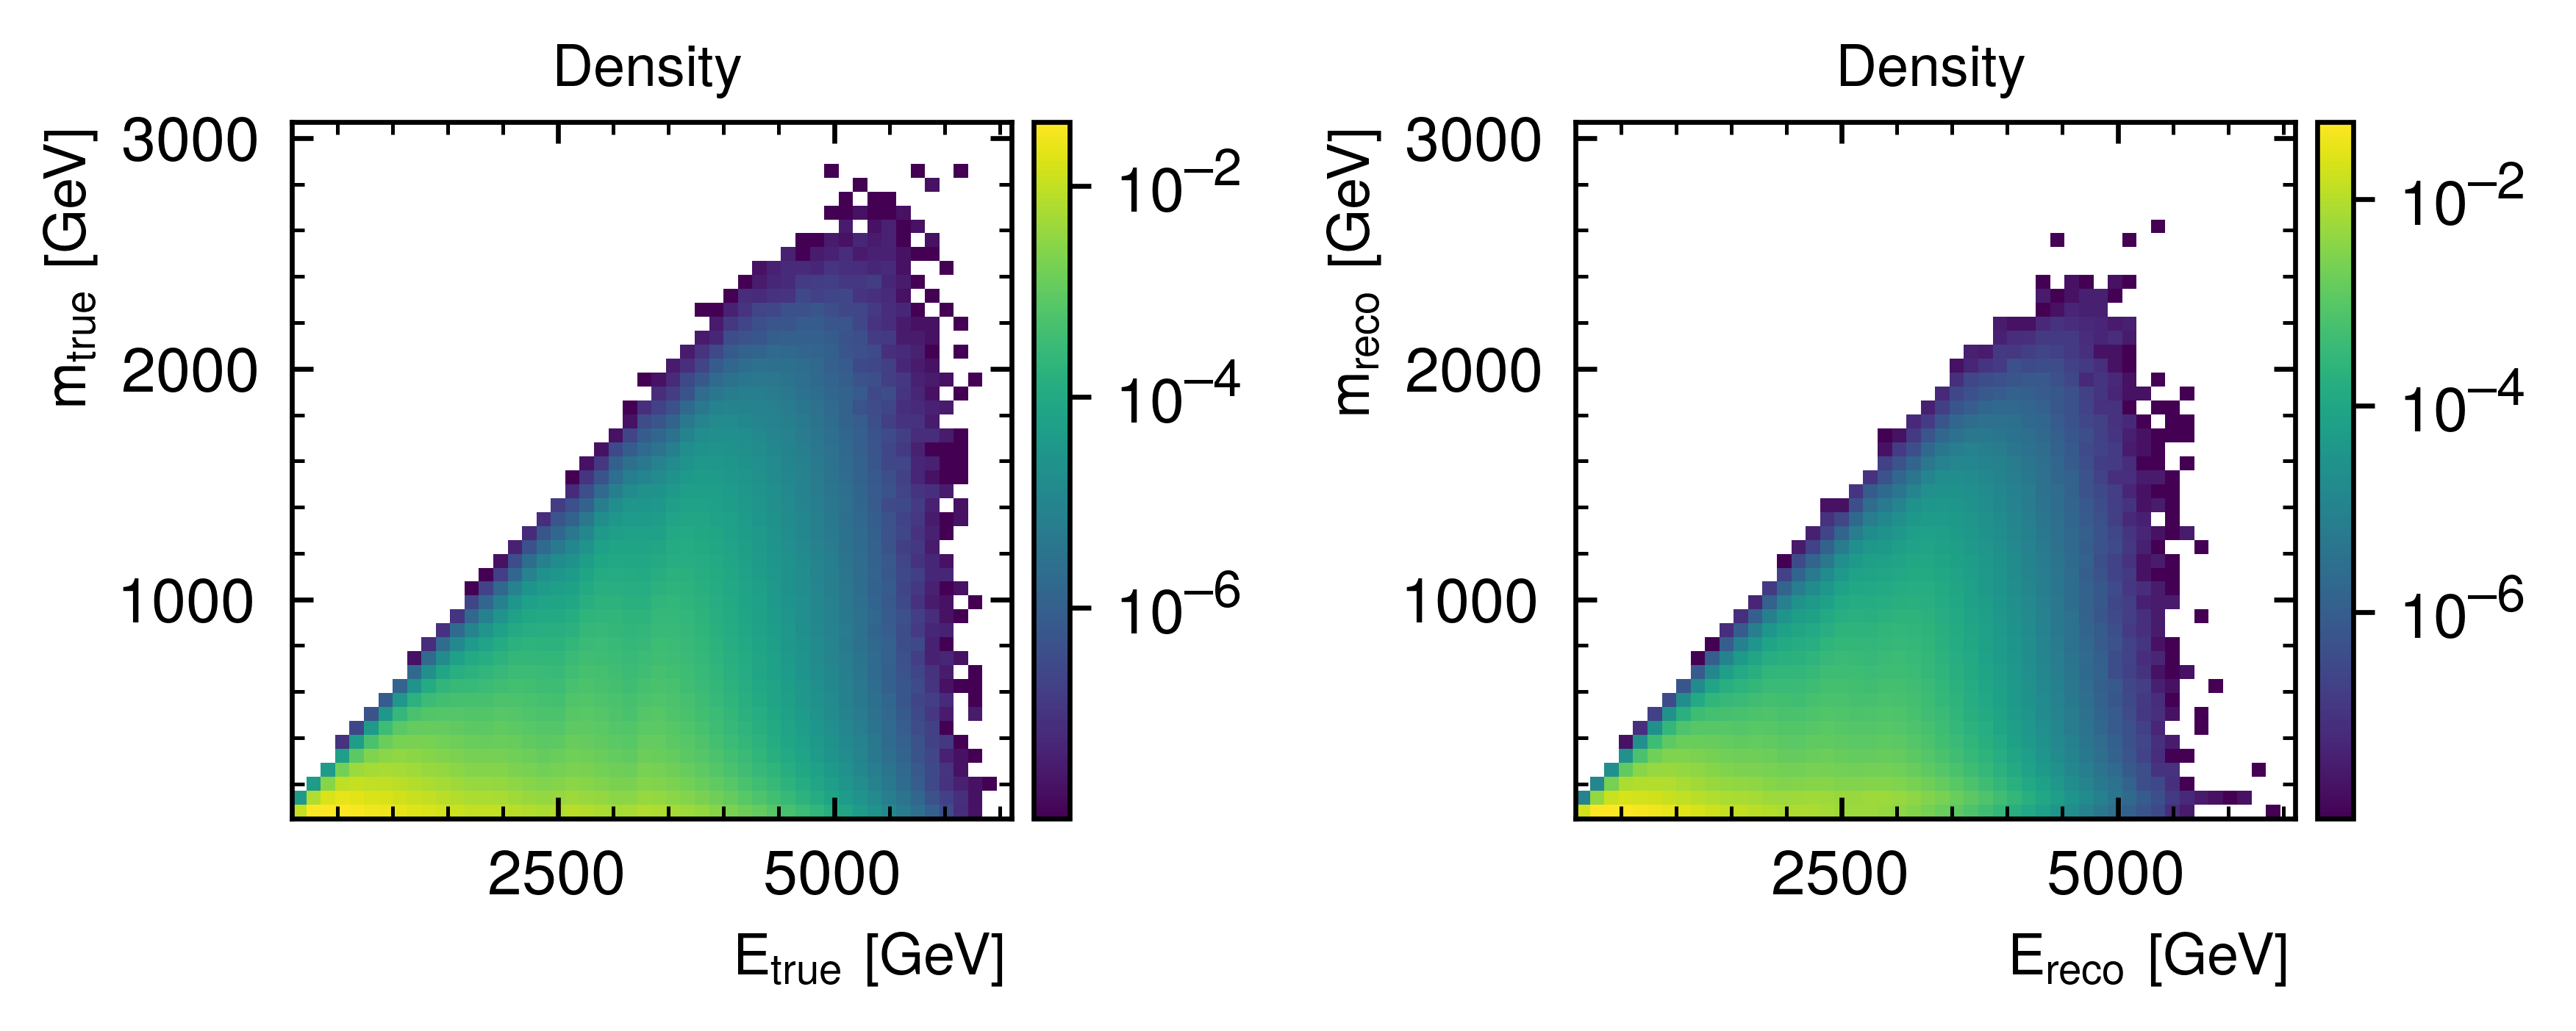

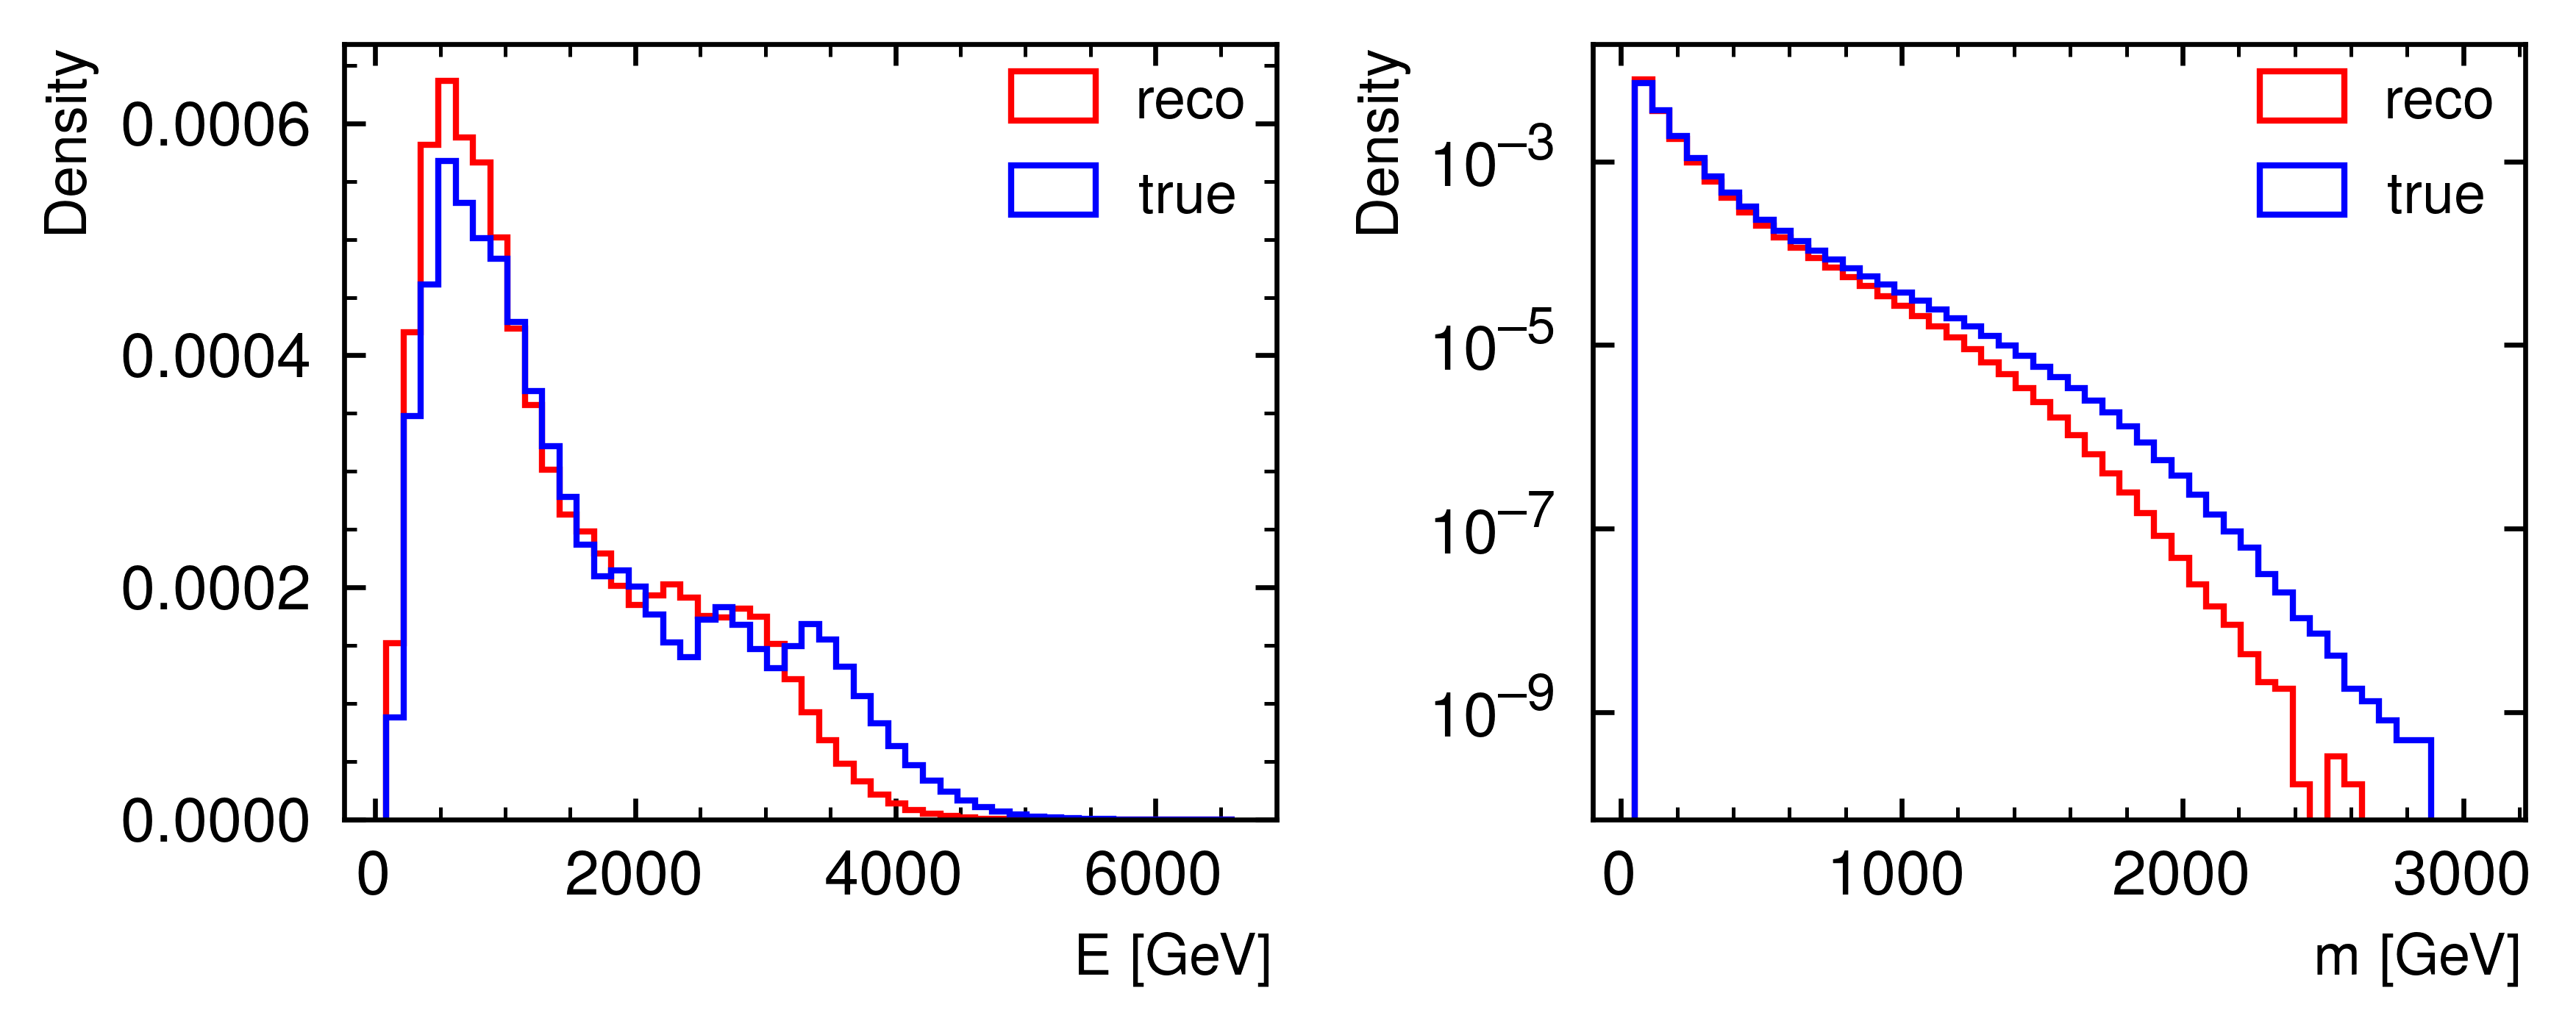

In [16]:
from Source.plots import _make_hist_2dim

label_fontsize = 11

plt.close()
# fig, axs = plt.subplots(1, 2, figsize=(1.40*2.953, 1.20*2.568))
fig, axs = plt.subplots(1, 2, figsize=(6, 2.5))

nbins = 50

# E_range = [min(min_vals[0], min_vals_reco[0]), max(max_vals[0], max_vals_reco[0])]
# m_range = [min(min_vals[1], min_vals_reco[1]), max(max_vals[1], max_vals_reco[1])]
E_range = [np.quantile([min_vals[0], min_vals_reco[0]], 0.001), np.quantile([max_vals[0], max_vals_reco[0]], 0.999)]
m_range = [np.quantile([min_vals[1], min_vals_reco[1]], 0.001), np.quantile([max_vals[1], max_vals_reco[1]], 0.999)]

mesh, cax = _make_hist_2dim(
    ax=axs[0],
    data=[vals[:,0], vals[:,1]],
    labels=[r"$E_{\text{true}} \; [\text{GeV}]$", r"$m_{\text{true}} \; [\text{GeV}]$"],
    ranges=[E_range, m_range],
    showdiag=False,
    nbins=[nbins,nbins],
    norm_columns=False,
    norm_rows=False,
    fontsize=label_fontsize,
)
cbar = fig.colorbar(mesh, cax=cax)
# cbar.set_label('Density', loc='center', fontsize=label_fontsize)
cbar.ax.tick_params(axis='y', which='both', direction='out')
axs[0].set_title("Density", fontsize=label_fontsize)

mesh, cax = _make_hist_2dim(
    ax=axs[1],
    data=[vals_reco[:,0], vals_reco[:,1]],
    labels=[r"$E_{\text{reco}} \; [\text{GeV}]$", r"$m_{\text{reco}} \; [\text{GeV}]$"],
    ranges=[E_range, m_range],
    showdiag=False,
    nbins=[nbins,nbins],
    norm_columns=False,
    norm_rows=False,
    fontsize=label_fontsize,
)
cbar = fig.colorbar(mesh, cax=cax)
# cbar.set_label('Density', loc='center', fontsize=label_fontsize)
cbar.ax.tick_params(axis='y', which='both', direction='out')
axs[1].set_title("Density", fontsize=label_fontsize)

plt.tight_layout()
plt.savefig(os.path.join("/remote/gpu03/schiller/JetCalibration/results/vis_data/", "jet_dataset_1.pdf"))
plt.show()

plt.close()
# fig, axs = plt.subplots(1, 2, figsize=(1.40*2.953, 1.20*2.568))
fig, axs = plt.subplots(1, 2, figsize=(6, 2.5))

bins_E = np.linspace(E_range[0], E_range[1], nbins)
bins_m = np.linspace(m_range[0], m_range[1], nbins)

axs[0].hist(vals_reco[:, 0], bins=bins_E, histtype="step", label="reco", density=True, color=Source.plots.colors['rd'])
axs[0].hist(vals[:, 0], bins=bins_E, histtype="step", label="true", density=True, color=Source.plots.colors['bl'])
axs[0].legend()
axs[0].set_xlabel(r"$E \; [\text{GeV}]$", fontsize=label_fontsize)
axs[0].set_ylabel("Density", fontsize=label_fontsize)

axs[1].hist(vals_reco[:, 1], bins=bins_m, histtype="step", label="reco", density=True, color=Source.plots.colors['rd'])
axs[1].hist(vals[:, 1], bins=bins_m, histtype="step", label="true", density=True, color=Source.plots.colors['bl'])
axs[1].legend()
axs[1].set_xlabel(r"$m \; [\text{GeV}]$", fontsize=label_fontsize)
axs[1].set_ylabel("Density", fontsize=label_fontsize)
axs[1].set_yscale("log")

plt.tight_layout()
plt.savefig(os.path.join("/remote/gpu03/schiller/JetCalibration/results/vis_data/", "jet_dataset_2.pdf"))
plt.show()

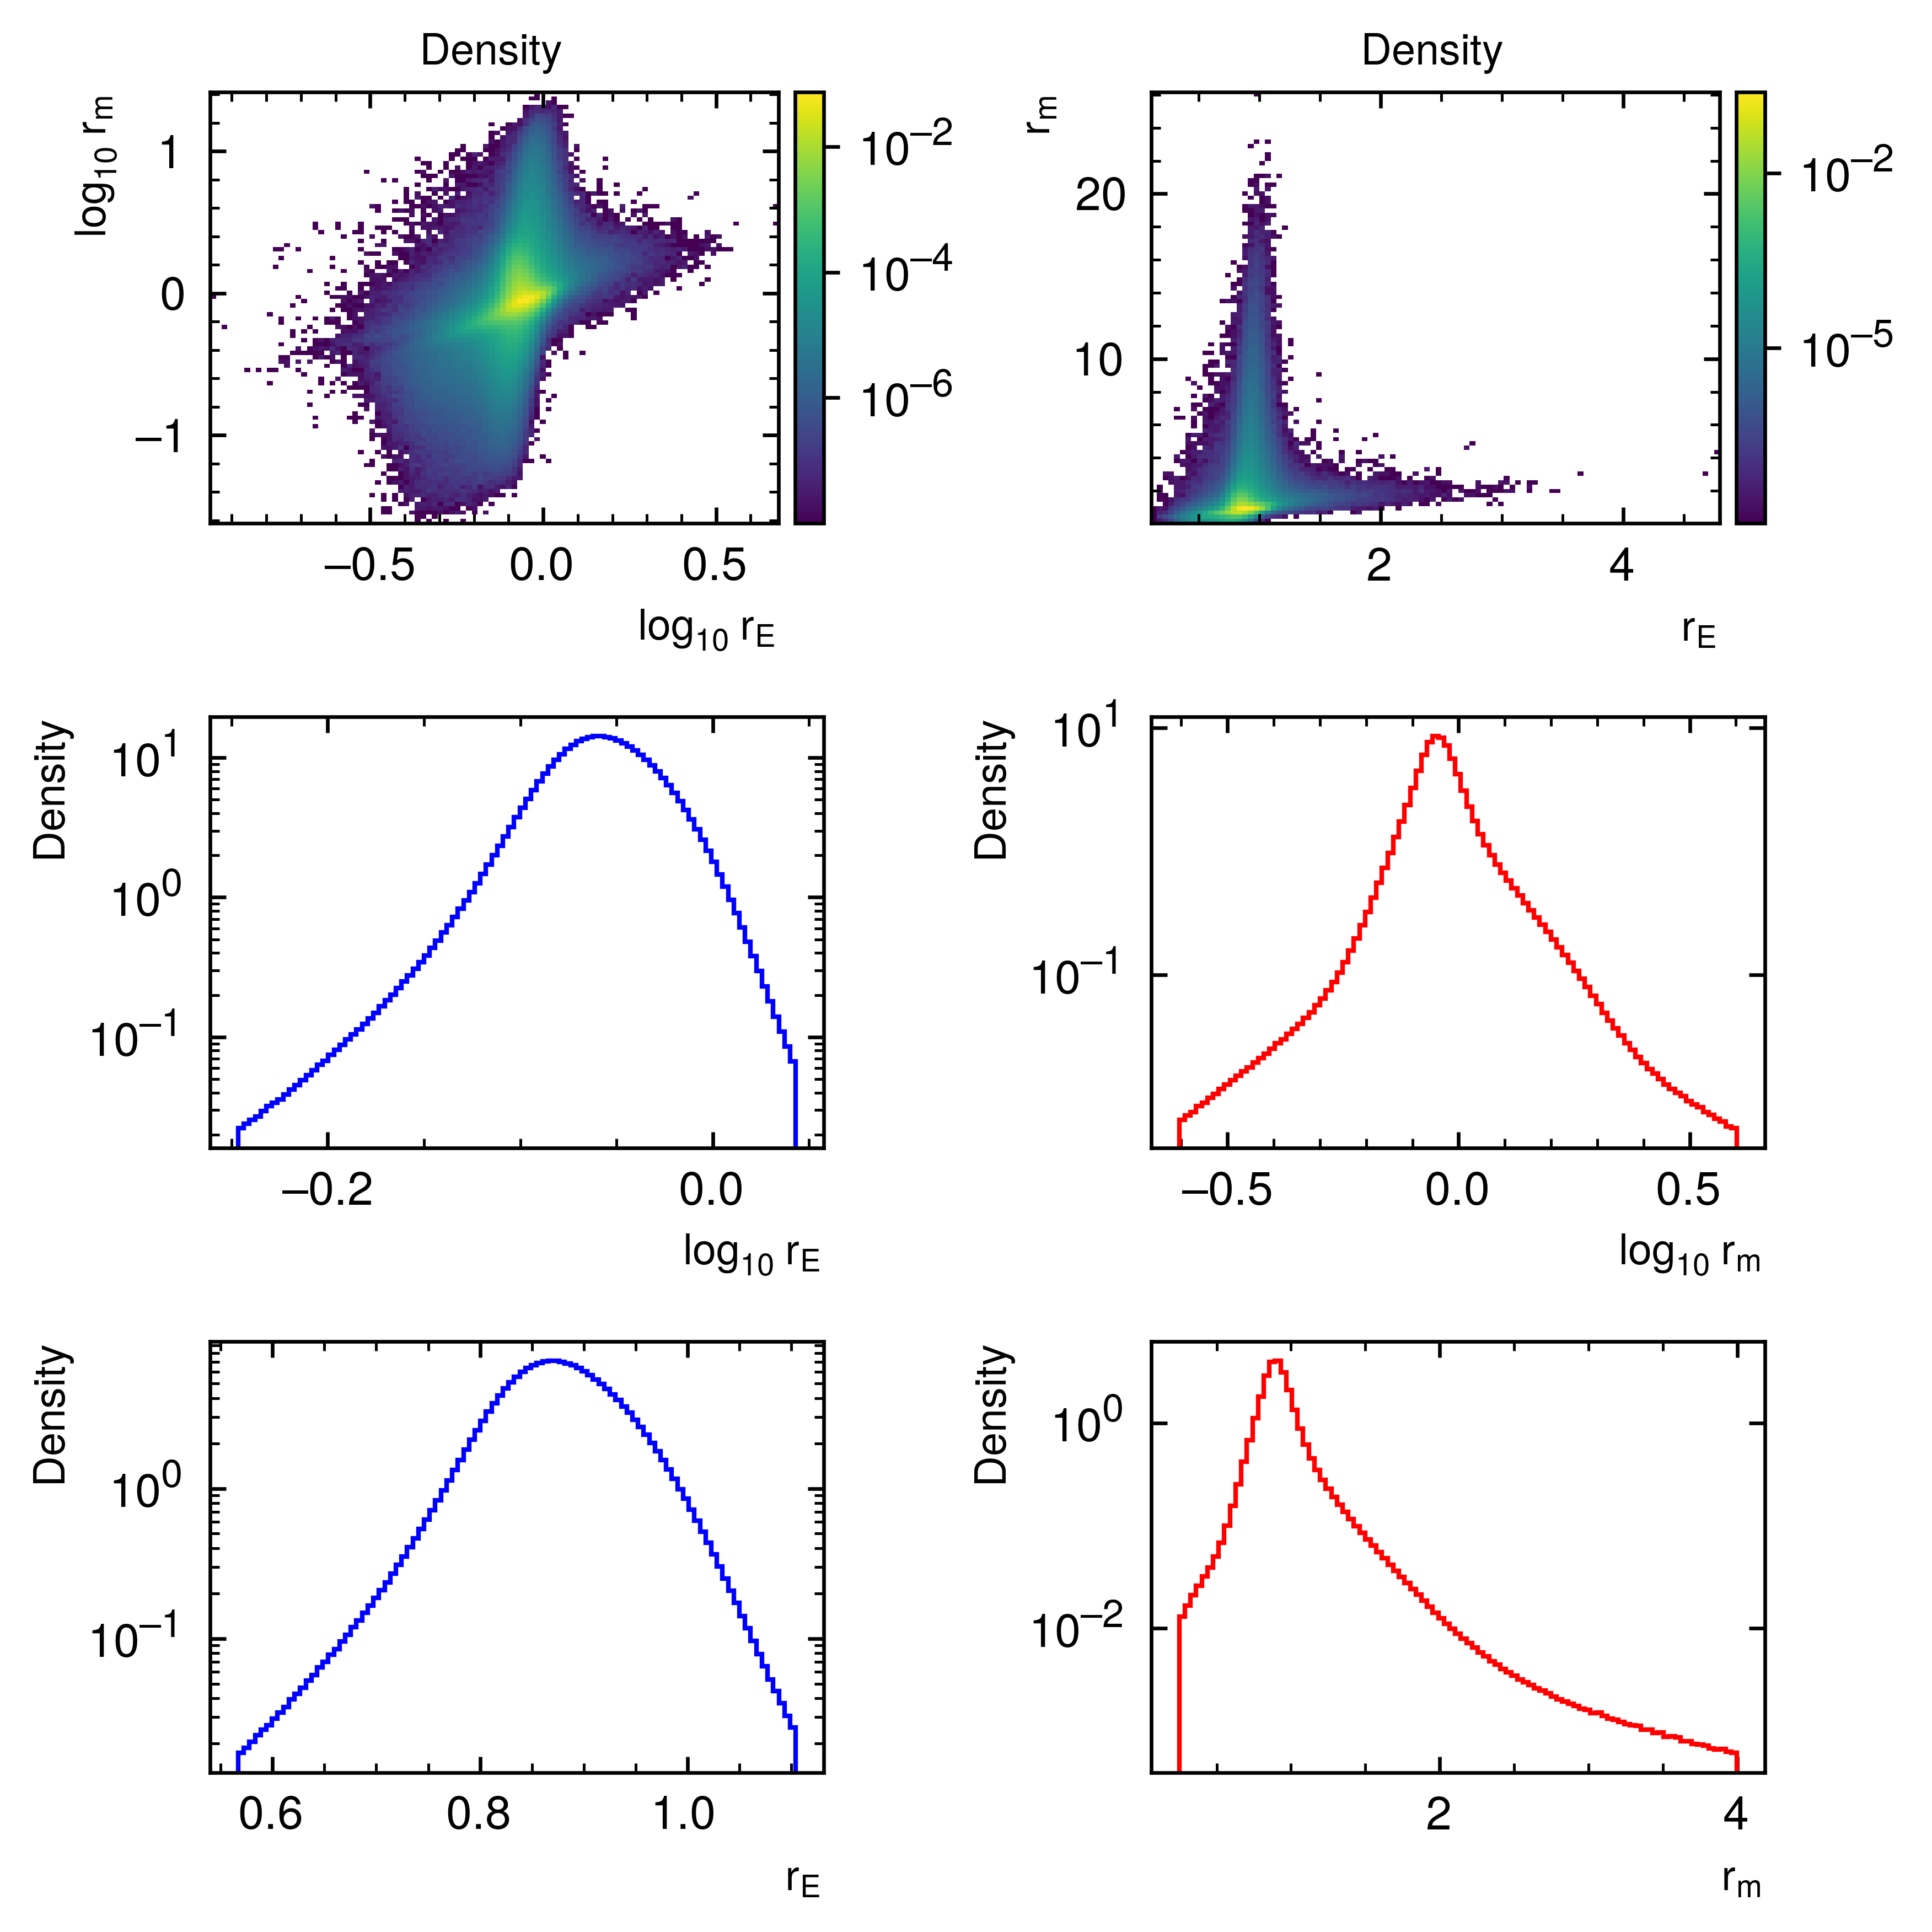

In [28]:
from Source.plots import _make_hist_2dim

label_fontsize = 11

plt.close()
fig, axs = plt.subplots(3, 2, figsize=(6, 6))

nbins = 100

rE_range_full = [np.min(target_data[:, 0]), np.max(target_data[:, 0])]
rm_range_full = [np.min(target_data[:, 1]), np.max(target_data[:, 1])]
log_rE_range = [np.quantile(target_data[:, 0], 0.001), np.quantile(target_data[:, 0], 0.999)]
log_rm_range = [np.quantile(target_data[:, 1], 0.001), np.quantile(target_data[:, 1], 0.999)]
rE_range = [np.quantile(10.**target_data[:, 0], 0.001), np.quantile(10.**target_data[:, 0], 0.999)]
rm_range = [np.quantile(10.**target_data[:, 1], 0.001), np.quantile(10.**target_data[:, 1], 0.999)]

mesh, cax = _make_hist_2dim(
    ax=axs[0, 0],
    data=[target_data[:,0], target_data[:,1]],
    labels=[r"$\log_{10} r_E$", r"$\log_{10} r_m$"],
    ranges=[rE_range_full, rm_range_full],
    showdiag=False,
    nbins=[nbins,nbins],
    norm_columns=False,
    norm_rows=False,
    fontsize=label_fontsize,
)
cbar = fig.colorbar(mesh, cax=cax)
cbar.ax.tick_params(axis='y', which='both', direction='out')
axs[0, 0].set_title("Density", fontsize=label_fontsize)

mesh, cax = _make_hist_2dim(
    ax=axs[0, 1],
    data=[10.**target_data[:,0], 10.**target_data[:,1]],
    labels=[r"$r_E$", r"$r_m$"],
    ranges=[[10.**x for x in rE_range_full], [10.**x for x in rm_range_full]],
    # ranges=[[10.**x for x in rE_range], [10.**x for x in rm_range]],
    showdiag=False,
    nbins=[nbins,nbins],
    norm_columns=False,
    norm_rows=False,
    fontsize=label_fontsize,
)
cbar = fig.colorbar(mesh, cax=cax)
cbar.ax.tick_params(axis='y', which='both', direction='out')
axs[0, 1].set_title("Density", fontsize=label_fontsize)

bins_log_rE = np.linspace(log_rE_range[0], log_rE_range[1], nbins)
bins_log_rm = np.linspace(log_rm_range[0], log_rm_range[1], nbins)

axs[1, 0].hist(target_data[:, 0], bins=bins_log_rE, histtype="step", density=True, color=Source.plots.colors['bl'])
axs[1, 0].set_xlabel(r"$\log_{10} r_E$", fontsize=label_fontsize)
axs[1, 0].set_ylabel("Density", fontsize=label_fontsize)
axs[1, 0].set_yscale("log")
# axs[1, 0].set_yticks([0.0005, 0.0002])
# axs[1, 0].set_yticklabels([r"$5 \cdot 10^{-4}$", r"$2 \cdot 10^{-4}$"])

axs[1, 1].hist(target_data[:, 1], bins=bins_log_rm, histtype="step", density=True, color=Source.plots.colors['rd'])
axs[1, 1].set_xlabel(r"$\log_{10} r_m$", fontsize=label_fontsize)
axs[1, 1].set_ylabel("Density", fontsize=label_fontsize)
axs[1, 1].set_yscale("log")

bins_rE = np.linspace(rE_range[0], rE_range[1], nbins)
bins_rm = np.linspace(rm_range[0], rm_range[1], nbins)

axs[2, 0].hist(10.**target_data[:, 0], bins=bins_rE, histtype="step", density=True, color=Source.plots.colors['bl'])
axs[2, 0].set_xlabel(r"$r_E$", fontsize=label_fontsize)
axs[2, 0].set_ylabel("Density", fontsize=label_fontsize)
axs[2, 0].set_yscale("log")
# axs[2, 0].set_yticks([0.0005, 0.0002])
# axs[2, 0].set_yticklabels([r"$5 \cdot 10^{-4}$", r"$2 \cdot 10^{-4}$"])

axs[2, 1].hist(10.**target_data[:, 1], bins=bins_rm, histtype="step", density=True, color=Source.plots.colors['rd'])
axs[2, 1].set_xlabel(r"$r_m$", fontsize=label_fontsize)
axs[2, 1].set_ylabel("Density", fontsize=label_fontsize)
axs[2, 1].set_yscale("log")

fig.tight_layout()
plt.show()
fig.savefig("/remote/gpu03/schiller/JetCalibration/results/vis_data/target_dataset.pdf")